In [15]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc

from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.expand_frame_repr', False)
from __future__ import print_function

In [19]:
# import the data from Will's notebook
all_data = pd.read_csv('all_data.csv')
all_data.head()

Id     MSSubClass MSZoning  LotFrontage  LotArea  Street Alley  LotShape LandContour LotConfig  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC Fence MiscFeature  MiscVal  MoSold SaleType SaleCondition  SalePrice  TotBathrooms  Remod  Age  IsNew  NeighWealth  TotalSqFeet  TotalPorchSF
0   1  2 story 1946+       RL         65.0     8450       1  None         3         Lvl    Inside          2      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd           1       196.0          4          3      PConc         4         3             1             6       706.0             1         0.0      150.0        856.0    GasA          5           1      SBrkr       856       854             0       1710           1.0           0.0         2         1             3             1            4             8           7           0            0     Attchd       2003.0             2         2.0       548.0           3           3           2           0           61              0          0            0         0       0  None        None        0       2       WD            WD   208500.0           3.5    0.0    5    0.0          1.0       2566.0            61
1   2  1 story 1946+       RL         80.0     9600       1  None         3         Lvl       FR2          2      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd           0         0.0          3          3     CBlock         4         3             4             5       978.0             1         0.0      284.0       1262.0    GasA          5           1      SBrkr      1262         0             0       1262           0.0           1.0         2         0             3             1            3             6           7           1            3     Attchd       1976.0             2         2.0       460.0           3           3           2         298            0              0          0            0         0       0  None        None        0       5       WD            WD   181500.0           2.5    0.0   31    0.0          1.0       2524.0             0
2   3  2 story 1946+       RL         68.0    11250       1  None         2         Lvl    Inside          2      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd           1       162.0          4          3      PConc         4         3             2             6       486.0             1         0.0      434.0        920.0    GasA          5           1      SBrkr       920       866             0       1786           1.0           0.0         2         1             3             1            4             6           7           1            3     Attchd       2001.0             2         2.0       608.0           3           3           2           0           42              0          0            0         0       0  None        None        0       9       WD            WD   223500.0           3.5    1.0    6    0.0          1.0       2706.0            42
3   4  2 story 1945-       RL         60.0     9550       1  None         2         Lvl    Corner          

In [20]:
numeric_columns = [col for col in all_data.columns if all_data[col].dtype in ['int64','float64']]

numeric_all_data = all_data[numeric_columns]
numeric_all_data.shape

(2919, 64)

In [39]:
X_numeric = numeric_all_data.drop(['Id', 'SalePrice'], 1)
y = all_data['SalePrice']
X_numeric.shape

(2919, 62)

### 1. Checking multicollinearity - Correlation matrix & VIF

#### 1.1. Correlation matrix

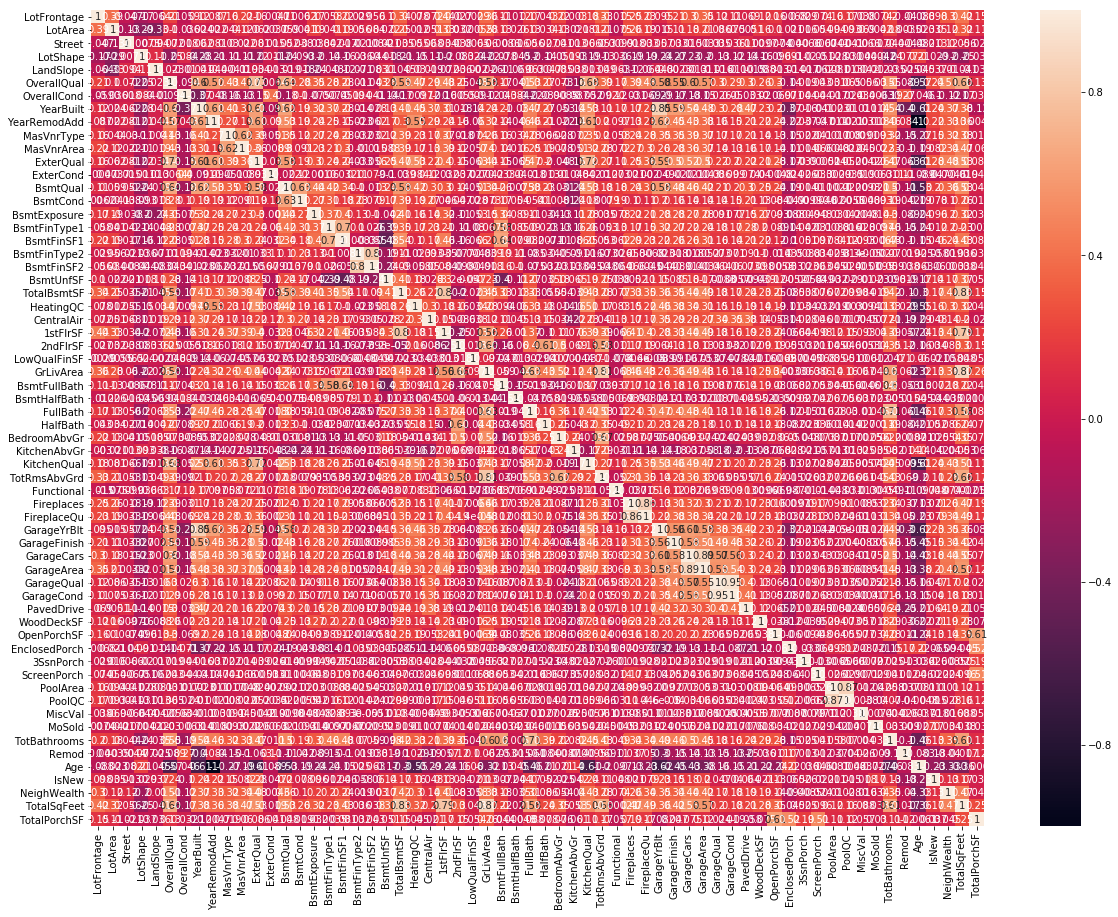

In [42]:
plt.figure(figsize=(20,15))
sns.heatmap(X_numeric.corr(), annot=True)
plt.show()

* It looks like Age, Lotshape, Porch related variables, PoolArea, Remode, etc. have pretty much multicollinearity.
(The variables related to feature engineering by Will need to be removed, but not yet)

#### 1.2. VIF (The Variance Inflation Factor)
* The VIF tells us the factor by which the estimated variance of a predictor variable is larger in comparison to if the predictor variable were to be completely uncorrelated with the other variables in the model.
* In general, predictors that have VIF values that exceed 5 need to be dealt with these variables’ VIFs indicate the corresponding regression coefficients are poorly estimated due to multicollinearity.
* The information of predictors with high VIF values is contained within the remaining predictor variables in the model; having a high VIF makes a predictor a candidate to be removed from the model entirely.

In [22]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option("display.max_rows",100)

In [46]:
X = X_numeric
#X = X_numeric.drop(['FullBath', 'BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'GrLivArea', 'TotalBsmtSF', 'OpenPorchSF',\
#                          'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1)

In [47]:
vif = pd.DataFrame()

vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [45]:
pd.options.display.float_format = '{:.2f}'.format
vif.sort_values('VIF', ascending=False)

features      VIF
24      2ndFlrSF      inf
23      1stFlrSF      inf
25  LowQualFinSF      inf
20     BsmtUnfSF      inf
19    BsmtFinSF2      inf
17    BsmtFinSF1      inf
50   TotalSqFeet      inf
7      YearBuilt 31502.78
8   YearRemodAdd 28334.94
33   GarageYrBlt 26397.22
2         Street   259.91
38    GarageCond   173.28
37    GarageQual   166.91
30    Functional   138.70
11     ExterQual   114.76
12     ExterCond    87.88
29  TotRmsAbvGrd    81.13
5    OverallQual    77.96
4      LandSlope    77.63
28   KitchenQual    76.33
13      BsmtQual    72.42
14      BsmtCond    71.18
6    OverallCond    50.25
35    GarageCars    40.58
27  KitchenAbvGr    38.68
36    GarageArea    35.24
21     HeatingQC    33.92
26  BedroomAbvGr    32.35
45  TotBathrooms    27.17
3       LotShape    27.01
22    CentralAir    22.55
39    PavedDrive    20.76
0    LotFrontage    17.65
49   NeighWealth    13.21
34  GarageFinish    10.56
16  BsmtFinType1    10.11
32   FireplaceQu     9.47
31    Fireplaces     8.72
18  BsmtFinType2     8.70
47           Age     7.63
44        MoSold     6.56
15  BsmtExposure     5.27
42        PoolQC     4.34
41      PoolArea     4.27
1        LotArea     4.17
46         Remod     3.12
9     MasVnrType     2.96
10    MasVnrArea     2.58
51  TotalPorchSF     2.08
40    WoodDeckSF     1.96
48         IsNew     1.28
43       MiscVal     1.06

### 2. Removing features with low variance
* If a predictor has the same value in all observations, it's useless.
* In linear regression, if a predictor is invariant, $X^TX$ will be singular. 

In [67]:
#all_variables = pd.concat([X_1, X_2], 1)
all_variables = all_data.drop(['Id', 'SalePrice'], 1)

In [68]:
np.var(all_variables, 0).sort_values()

Street                 0.00
IsNew                  0.04
KitchenAbvGr           0.05
BsmtHalfBath           0.06
LandSlope              0.06
CentralAir             0.06
PoolQC                 0.06
ExterCond              0.14
NeighWealth            0.15
Remod                  0.25
HalfBath               0.25
BsmtFullBath           0.28
PavedDrive             0.29
FullBath               0.31
BsmtCond               0.32
LotShape               0.32
ExterQual              0.34
Functional             0.41
Fireplaces             0.42
MasVnrType             0.42
KitchenQual            0.44
GarageCond             0.50
GarageQual             0.51
GarageCars             0.58
TotBathrooms           0.65
BedroomAbvGr           0.68
GarageFinish           0.80
BsmtQual               0.81
BsmtFinType2           0.91
HeatingQC              0.92
BsmtExposure           1.14
OverallCond            1.24
OverallQual            1.99
TotRmsAbvGrd           2.46
FireplaceQu            3.26
BsmtFinType1        

### 3. Univariate Feature Selection

In [61]:
import sklearn.feature_selection as fs

In [59]:
fs.f_regression(X_numeric[:1460], y[:1460])

(array([2.00542138e+02, 1.09090355e+02, 2.45928956e+00, 1.12604574e+02,
        3.82494170e+00, 2.43677059e+03, 8.89162260e+00, 5.48665821e+02,
        5.04714855e+02, 3.24560164e+02, 4.19328468e+02, 1.27231834e+03,
        5.20949670e-01, 7.59380775e+02, 6.90242493e+01, 2.38648393e+02,
        1.49441969e+02, 2.55923517e+02, 2.73277764e-02, 1.88779522e-01,
        7.03039481e+01, 8.80341282e+02, 3.26323107e+02, 9.83053436e+01,
        8.45524488e+02, 1.65561151e+02, 9.56599754e-01, 1.47058501e+03,
        7.93009124e+01, 4.13789231e-01, 6.68430296e+02, 1.28018964e+02,
        4.24564124e+01, 2.74372340e+01, 1.12285891e+03, 5.80762801e+02,
        1.70841684e+01, 4.06503866e+02, 5.41603101e+02, 5.07245567e+02,
        6.29844106e+02, 1.01370567e+03, 9.26951287e+02, 1.18195493e+02,
        1.08511279e+02, 8.24544241e+01, 1.71494673e+02, 1.61577391e+02,
        2.45092751e+01, 2.90384327e+00, 1.83365999e+01, 1.25562207e+01,
        1.84197542e+01, 6.54933564e-01, 3.15017168e+00, 9.682964

### 4. Regularization
- Fit a model using a technique that regularizes the coefficient estimates, or equivalently, that shrinks the coefficient estimates towards zero. 
- Shrinking the coefficient estimates can significantly reduce their variances.
- The two best-known techniques of shrinking methods are **ridge regression** and **lasso**.

* Note: Below is little bit messy: I was able to run the ridge and the lasso, but didn't figure out how to do how to get the variable importance using sklearn yet, so I used R and its caret package instead to do those. See the R markdown file that I also uploaded. 

In [69]:
# exporting the data 
pd.concat([X_numeric, y], 1).to_csv('data_after_preproc.csv')

In [183]:
full_dt = X_1.merge(y_bos.to_frame(), how='left', left_index=True, right_index=True)

In [189]:
train_x = full_dt[full_dt.SalePrice.notnull()].drop(['SalePrice'], 1)
train_y = full_dt[full_dt.SalePrice.notnull()].SalePrice

In [204]:
import sklearn.datasets
import sklearn.cross_validation as cv
from sklearn import linear_model

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [190]:
# Ridge
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(train_x, train_y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients

(array([-6.36933229e+01,  3.88244128e-01,  1.10227971e+04, -2.08683296e+02,
        -4.88735767e+03,  1.02459410e+04,  5.50727869e+03,  2.58468773e+02,
        -3.90250542e+02, -4.21455557e+03,  2.61417162e+01,  9.38510080e+03,
        -2.77576557e+03,  7.40515617e+03, -8.63580827e+03,  5.07782273e+03,
         1.13130781e+03, -1.95662638e-02, -1.19823022e+03,  4.05475638e+00,
        -5.95888606e+00, -1.92369302e+00,  1.34157835e+03, -4.69121556e+02,
         1.86729253e+01,  5.86584057e+00, -1.06697951e+01,  1.38689630e+01,
         9.25510227e+02, -2.50070397e+03,  1.31430906e+03,  2.37902390e+03,
        -4.17468742e+03, -2.43512889e+04,  8.97229434e+03,  5.45247937e+03,
         5.18381432e+03,  4.70456413e+03, -3.25128007e+02, -9.49086249e+01,
         9.52041052e+02,  8.62943007e+03,  1.87542016e+01,  4.89701668e+03,
        -1.00606769e+04,  5.52559399e+02,  1.77137985e+01, -2.02973031e+01,
        -1.13868197e+01,  1.66796673e+01,  3.22388040e+01, -1.38841771e+01,
        -4.7

In [191]:
ridge.score(train_x, train_y)

0.8429594752380949

In [222]:
alpha_100 = np.logspace(0, 8, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(train_x, train_y)
    coef.append(ridge.coef_)

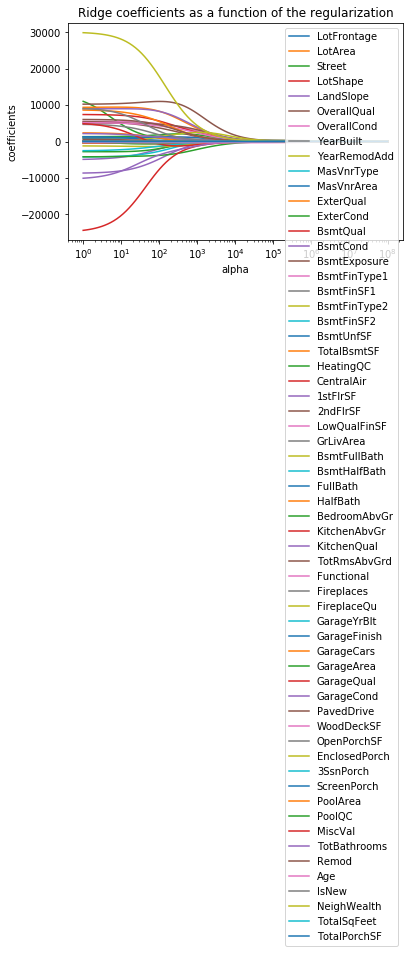

In [223]:
df_coef = pd.DataFrame(coef, index=alpha_100, columns=train_x.columns)
import matplotlib.pyplot as plt
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.show()

In [224]:
alphas = np.logspace(-10, 8, 100)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(train_x, train_y)
    scores[i] = lasso.score(train_x, train_y)
    print(a, lasso.coef_)

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1e-10 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571666e+00
  1.55775735e+04  4.79572972e+03  1.60140347e+04  9.74127163e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663340e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365382e+01
 -7.07488734e+01 -4.26628372e+01 -2.70198315e+01 -1.41349539e+01
  3.74082671e+01  6.58114083e-01 -1.24533713e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7.64628139e+01]
1

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


2.310129700083158e-10 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571666e+00
  1.55775735e+04  4.79572972e+03  1.60140347e+04  9.74127163e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663340e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365382e+01
 -7.07488734e+01 -4.26628372e+01 -2.70198315e+01 -1.41349539e+01
  3.74082671e+01  6.58114083e-01 -1.24533713e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5.336699231206302e-10 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571666e+00
  1.55775735e+04  4.79572972e+03  1.60140347e+04  9.74127163e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663340e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365382e+01
 -7.07488734e+01 -4.26628372e+01 -2.70198315e+01 -1.41349539e+01
  3.74082671e+01  6.58114083e-01 -1.24533713e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1.873817422860387e-09 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571666e+00
  1.55775734e+04  4.79572972e+03  1.60140347e+04  9.74127162e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663340e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365381e+01
 -7.07488734e+01 -4.26628372e+01 -2.70198315e+01 -1.41349539e+01
  3.74082669e+01  6.58114083e-01 -1.24533713e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1e-08 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571667e+00
  1.55775734e+04  4.79572969e+03  1.60140346e+04  9.74127160e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663339e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365381e+01
 -7.07488733e+01 -4.26628371e+01 -2.70198315e+01 -1.41349539e+01
  3.74082659e+01  6.58114083e-01 -1.24533712e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7.64628139e+01]
1

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


2.310129700083158e-08 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571667e+00
  1.55775733e+04  4.79572965e+03  1.60140345e+04  9.74127156e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663339e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365380e+01
 -7.07488733e+01 -4.26628371e+01 -2.70198314e+01 -1.41349539e+01
  3.74082642e+01  6.58114083e-01 -1.24533712e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5.3366992312063125e-08 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714390e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571667e+00
  1.55775731e+04  4.79572956e+03  1.60140343e+04  9.74127146e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073367e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663339e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365379e+01
 -7.07488731e+01 -4.26628369e+01 -2.70198312e+01 -1.41349539e+01
  3.74082603e+01  6.58114083e-01 -1.24533710e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1.232846739442066e-07 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543898e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714388e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571667e+00
  1.55775727e+04  4.79572934e+03  1.60140339e+04  9.74127125e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073367e+02 -9.52077574e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663339e+03
 -1.03552748e+04  5.61334298e+02  1.76692138e+01 -7.95365375e+01
 -7.07488727e+01 -4.26628365e+01 -2.70198308e+01 -1.41349538e+01
  3.74082514e+01  6.58114083e-01 -1.24533705e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471039e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


2.848035868435805e-07 [-6.46482848e+01  3.89348783e-01  1.30760859e+04 -1.90119146e+02
 -4.98500490e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543898e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660019e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714384e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571667e+00
  1.55775717e+04  4.79572884e+03  1.60140329e+04  9.74127075e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798458e+03 -3.55073366e+02 -9.52077574e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663338e+03
 -1.03552748e+04  5.61334297e+02  1.76692138e+01 -7.95365366e+01
 -7.07488718e+01 -4.26628356e+01 -2.70198300e+01 -1.41349537e+01
  3.74082308e+01  6.58114082e-01 -1.24533695e+04  6.06272797e+03
 -2.00422048e+02  9.27792974e+03  3.00406819e+04 -3.89471039e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1e-06 [-6.46482847e+01  3.89348783e-01  1.30760858e+04 -1.90119145e+02
 -4.98500489e+03  1.02187565e+04  5.50183087e+03  2.57749138e+02
 -3.26642196e+02 -4.24543898e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660019e+03 -8.69065271e+03  5.09462890e+03
  1.12594828e+03  3.24367713e+01 -1.17934713e+03  3.64314805e+01
  2.65150691e+01  1.64773960e+01  1.34110803e+03 -5.10714367e+02
  7.57536190e+01  6.28690193e+01  4.62603745e+01  7.60571669e+00
  1.55775673e+04  4.79572663e+03  1.60140285e+04  9.74126855e+03
 -4.17939045e+03 -2.49327348e+04  8.96427034e+03  5.49636811e+03
  5.21308447e+03  4.75798457e+03 -3.55073360e+02 -9.52077571e+01
  9.39976984e+02  8.71057714e+03  1.86771278e+01  5.15663334e+03
 -1.03552748e+04  5.61334292e+02  1.76692138e+01 -7.95365327e+01
 -7.07488679e+01 -4.26628317e+01 -2.70198261e+01 -1.41349532e+01
  3.74081394e+01  6.58114080e-01 -1.24533651e+04  6.06272796e+03
 -2.00422047e+02  9.27792972e+03  3.00406819e+04 -3.89471040e+01
  7.64628084e+01]
1

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

3.5111917342151347e-06 [-6.46482844e+01  3.89348783e-01  1.30760851e+04 -1.90119142e+02
 -4.98500483e+03  1.02187565e+04  5.50183087e+03  2.57749138e+02
 -3.26642194e+02 -4.24543897e+03  2.61398939e+01  9.36077558e+03
 -2.76263760e+03  7.42660016e+03 -8.69065269e+03  5.09462890e+03
  1.12594828e+03  3.24367717e+01 -1.17934713e+03  3.64314807e+01
  2.65150694e+01  1.64773963e+01  1.34110802e+03 -5.10714304e+02
  7.57536194e+01  6.28690198e+01  4.62603750e+01  7.60571676e+00
  1.55775518e+04  4.79571887e+03  1.60140130e+04  9.74126081e+03
 -4.17939045e+03 -2.49327347e+04  8.96427035e+03  5.49636810e+03
  5.21308445e+03  4.75798453e+03 -3.55073339e+02 -9.52077561e+01
  9.39976989e+02  8.71057712e+03  1.86771278e+01  5.15663321e+03
 -1.03552747e+04  5.61334275e+02  1.76692138e+01 -7.95365188e+01
 -7.07488541e+01 -4.26628179e+01 -2.70198124e+01 -1.41349512e+01
  3.74078186e+01  6.58114072e-01 -1.24533497e+04  6.06272795e+03
 -2.00422045e+02  9.27792964e+03  3.00406819e+04 -3.89471045e+01
  

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1.873817422860383e-05 [-6.46482824e+01  3.89348782e-01  1.30760811e+04 -1.90119127e+02
 -4.98500451e+03  1.02187565e+04  5.50183083e+03  2.57749133e+02
 -3.26642178e+02 -4.24543892e+03  2.61398938e+01  9.36077556e+03
 -2.76263749e+03  7.42660002e+03 -8.69065254e+03  5.09462891e+03
  1.12594827e+03  3.24367737e+01 -1.17934709e+03  3.64314824e+01
  2.65150712e+01  1.64773975e+01  1.34110797e+03 -5.10713925e+02
  7.57536219e+01  6.28690225e+01  4.62603781e+01  7.60571720e+00
  1.55774581e+04  4.79567180e+03  1.60139193e+04  9.74121388e+03
 -4.17939042e+03 -2.49327342e+04  8.96427045e+03  5.49636806e+03
  5.21308438e+03  4.75798430e+03 -3.55073213e+02 -9.52077500e+01
  9.39977022e+02  8.71057700e+03  1.86771280e+01  5.15663240e+03
 -1.03552738e+04  5.61334173e+02  1.76692137e+01 -7.95364350e+01
 -7.07487707e+01 -4.26627342e+01 -2.70197293e+01 -1.41349392e+01
  3.74058733e+01  6.58114021e-01 -1.24532560e+04  6.06272785e+03
 -2.00422032e+02  9.27792917e+03  3.00406817e+04 -3.89471075e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


4.328761281083062e-05 [-6.46482792e+01  3.89348781e-01  1.30760747e+04 -1.90119101e+02
 -4.98500399e+03  1.02187565e+04  5.50183076e+03  2.57749127e+02
 -3.26642153e+02 -4.24543882e+03  2.61398936e+01  9.36077553e+03
 -2.76263731e+03  7.42659978e+03 -8.69065229e+03  5.09462892e+03
  1.12594825e+03  3.24367769e+01 -1.17934704e+03  3.64314851e+01
  2.65150742e+01  1.64773996e+01  1.34110789e+03 -5.10713315e+02
  7.57536258e+01  6.28690268e+01  4.62603831e+01  7.60571789e+00
  1.55773069e+04  4.79559591e+03  1.60137682e+04  9.74113822e+03
 -4.17939037e+03 -2.49327333e+04  8.96427060e+03  5.49636800e+03
  5.21308427e+03  4.75798392e+03 -3.55073011e+02 -9.52077402e+01
  9.39977074e+02  8.71057681e+03  1.86771283e+01  5.15663110e+03
 -1.03552725e+04  5.61334007e+02  1.76692137e+01 -7.95362998e+01
 -7.07486361e+01 -4.26625993e+01 -2.70195954e+01 -1.41349199e+01
  3.74027371e+01  6.58113941e-01 -1.24531048e+04  6.06272769e+03
 -2.00422011e+02  9.27792840e+03  3.00406815e+04 -3.89471123e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0001 [-6.46482719e+01  3.89348780e-01  1.30760598e+04 -1.90119043e+02
 -4.98500278e+03  1.02187566e+04  5.50183060e+03  2.57749111e+02
 -3.26642095e+02 -4.24543861e+03  2.61398932e+01  9.36077547e+03
 -2.76263689e+03  7.42659923e+03 -8.69065173e+03  5.09462894e+03
  1.12594821e+03  3.24367844e+01 -1.17934691e+03  3.64314913e+01
  2.65150810e+01  1.64774044e+01  1.34110770e+03 -5.10711905e+02
  7.57536348e+01  6.28690368e+01  4.62603947e+01  7.60571950e+00
  1.55769576e+04  4.79542059e+03  1.60134191e+04  9.74096343e+03
 -4.17939027e+03 -2.49327313e+04  8.96427095e+03  5.49636787e+03
  5.21308400e+03  4.75798303e+03 -3.55072543e+02 -9.52077175e+01
  9.39977196e+02  8.71057637e+03  1.86771291e+01  5.15662809e+03
 -1.03552695e+04  5.61333624e+02  1.76692135e+01 -7.95359875e+01
 -7.07483251e+01 -4.26622876e+01 -2.70192861e+01 -1.41348753e+01
  3.73954920e+01  6.58113754e-01 -1.24527557e+04  6.06272733e+03
 -2.00421962e+02  9.27792663e+03  3.00406810e+04 -3.89471234e+01
  7.64622660e+01]


C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.00023101297000831627 [-6.46482549e+01  3.89348775e-01  1.30760254e+04 -1.90118908e+02
 -4.98500000e+03  1.02187566e+04  5.50183025e+03  2.57749074e+02
 -3.26641961e+02 -4.24543812e+03  2.61398923e+01  9.36077532e+03
 -2.76263593e+03  7.42659795e+03 -8.69065043e+03  5.09462899e+03
  1.12594811e+03  3.24368017e+01 -1.17934662e+03  3.64315057e+01
  2.65150966e+01  1.64774153e+01  1.34110726e+03 -5.10708647e+02
  7.57536557e+01  6.28690600e+01  4.62604216e+01  7.60572321e+00
  1.55761508e+04  4.79501559e+03  1.60126126e+04  9.74055966e+03
 -4.17939003e+03 -2.49327265e+04  8.96427177e+03  5.49636755e+03
  5.21308339e+03  4.75798100e+03 -3.55071463e+02 -9.52076650e+01
  9.39977477e+02  8.71057536e+03  1.86771309e+01  5.15662114e+03
 -1.03552626e+04  5.61332739e+02  1.76692132e+01 -7.95352662e+01
 -7.07476068e+01 -4.26615675e+01 -2.70185715e+01 -1.41347722e+01
  3.73787549e+01  6.58113322e-01 -1.24519492e+04  6.06272648e+03
 -2.00421849e+02  9.27792255e+03  3.00406797e+04 -3.89471491e+01
  

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0005336699231206312 [-6.46482157e+01  3.89348765e-01  1.30759460e+04 -1.90118597e+02
 -4.98499358e+03  1.02187567e+04  5.50182942e+03  2.57748988e+02
 -3.26641651e+02 -4.24543698e+03  2.61398902e+01  9.36077498e+03
 -2.76263371e+03  7.42659501e+03 -8.69064744e+03  5.09462911e+03
  1.12594788e+03  3.24368416e+01 -1.17934594e+03  3.64315390e+01
  2.65151329e+01  1.64774407e+01  1.34110624e+03 -5.10701120e+02
  7.57537039e+01  6.28691135e+01  4.62604835e+01  7.60573179e+00
  1.55742869e+04  4.79407997e+03  1.60107496e+04  9.73962689e+03
 -4.17938947e+03 -2.49327156e+04  8.96427365e+03  5.49636682e+03
  5.21308197e+03  4.75797629e+03 -3.55068968e+02 -9.52075438e+01
  9.39978126e+02  8.71057302e+03  1.86771349e+01  5.15660509e+03
 -1.03552465e+04  5.61330695e+02  1.76692124e+01 -7.95335997e+01
 -7.07459474e+01 -4.26599040e+01 -2.70169207e+01 -1.41345341e+01
  3.73400900e+01  6.58112325e-01 -1.24500862e+04  6.06272453e+03
 -2.00421588e+02  9.27791311e+03  3.00406768e+04 -3.89472085e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0012328467394420659 [-6.46481251e+01  3.89348742e-01  1.30757625e+04 -1.90117879e+02
 -4.98497873e+03  1.02187570e+04  5.50182752e+03  2.57748791e+02
 -3.26640934e+02 -4.24543436e+03  2.61398854e+01  9.36077420e+03
 -2.76262858e+03  7.42658822e+03 -8.69064052e+03  5.09462939e+03
  1.12594734e+03  3.24369338e+01 -1.17934438e+03  3.64316158e+01
  2.65152166e+01  1.64774994e+01  1.34110389e+03 -5.10683733e+02
  7.57538153e+01  6.28692371e+01  4.62606267e+01  7.60575160e+00
  1.55699811e+04  4.79191858e+03  1.60064457e+04  9.73747208e+03
 -4.17938819e+03 -2.49326904e+04  8.96427800e+03  5.49636514e+03
  5.21307869e+03  4.75796542e+03 -3.55063203e+02 -9.52072638e+01
  9.39979626e+02  8.71056762e+03  1.86771444e+01  5.15656800e+03
 -1.03552093e+04  5.61325972e+02  1.76692106e+01 -7.95297499e+01
 -7.07421141e+01 -4.26560612e+01 -2.70131072e+01 -1.41339841e+01
  3.72507685e+01  6.58110021e-01 -1.24457822e+04  6.06272003e+03
 -2.00420983e+02  9.27789130e+03  3.00406700e+04 -3.89473455e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.004328761281083062 [-6.46477241e+01  3.89348641e-01  1.30749499e+04 -1.90114698e+02
 -4.98491299e+03  1.02187581e+04  5.50181908e+03  2.57747919e+02
 -3.26637753e+02 -4.24542273e+03  2.61398642e+01  9.36077073e+03
 -2.76260586e+03  7.42655815e+03 -8.69060987e+03  5.09463062e+03
  1.12594497e+03  3.24373419e+01 -1.17933745e+03  3.64319559e+01
  2.65155872e+01  1.64777592e+01  1.34109350e+03 -5.10606741e+02
  7.57543085e+01  6.28697843e+01  4.62612606e+01  7.60583934e+00
  1.55509153e+04  4.78234808e+03  1.59873884e+04  9.72793067e+03
 -4.17938249e+03 -2.49325789e+04  8.96429725e+03  5.49635768e+03
  5.21306416e+03  4.75791728e+03 -3.55037676e+02 -9.52060241e+01
  9.39986266e+02  8.71054372e+03  1.86771860e+01  5.15640379e+03
 -1.03550446e+04  5.61305062e+02  1.76692025e+01 -7.95127031e+01
 -7.07251400e+01 -4.26390452e+01 -2.69962211e+01 -1.41315485e+01
  3.68552565e+01  6.58099821e-01 -1.24267247e+04  6.06270010e+03
 -2.00418301e+02  9.27779476e+03  3.00406402e+04 -3.89479525e+01
  7.

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.01519911082952933 [-6.46463163e+01  3.89348284e-01  1.30720971e+04 -1.90103532e+02
 -4.98468214e+03  1.02187619e+04  5.50178946e+03  2.57744857e+02
 -3.26626525e+02 -4.24538192e+03  2.61397896e+01  9.36075855e+03
 -2.76252611e+03  7.42645257e+03 -8.69050225e+03  5.09463495e+03
  1.12593665e+03  3.24387748e+01 -1.17931313e+03  3.64331497e+01
  2.65168880e+01  1.64786710e+01  1.34105703e+03 -5.10336401e+02
  7.57560396e+01  6.28717050e+01  4.62634857e+01  7.60614732e+00
  1.54839715e+04  4.74874424e+03  1.59204746e+04  9.69442899e+03
 -4.17936249e+03 -2.49321873e+04  8.96436484e+03  5.49633151e+03
  5.21301317e+03  4.75774825e+03 -3.54948039e+02 -9.52016712e+01
  9.40009578e+02  8.71045979e+03  1.86773324e+01  5.15582719e+03
 -1.03544663e+04  5.61231643e+02  1.76691743e+01 -7.94528478e+01
 -7.06655401e+01 -4.25792979e+01 -2.69369298e+01 -1.41229966e+01
  3.54665147e+01  6.58064006e-01 -1.23598099e+04  6.06263011e+03
 -2.00408822e+02  9.27745580e+03  3.00405352e+04 -3.89500829e+01
  7.6

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.03511191734215127 [-6.46437375e+01  3.89347630e-01  1.30668710e+04 -1.90083079e+02
 -4.98425928e+03  1.02187689e+04  5.50173519e+03  2.57739247e+02
 -3.26605940e+02 -4.24530717e+03  2.61396531e+01  9.36073625e+03
 -2.76238000e+03  7.42625916e+03 -8.69030510e+03  5.09464290e+03
  1.12592140e+03  3.24413995e+01 -1.17926859e+03  3.64353363e+01
  2.65192709e+01  1.64803412e+01  1.34099022e+03 -5.09841177e+02
  7.57592108e+01  6.28752233e+01  4.62675616e+01  7.60671149e+00
  1.53613407e+04  4.68718717e+03  1.57978988e+04  9.63305906e+03
 -4.17932585e+03 -2.49314699e+04  8.96448866e+03  5.49628355e+03
  5.21291976e+03  4.75743861e+03 -3.54783837e+02 -9.51936972e+01
  9.40052280e+02  8.71030606e+03  1.86776005e+01  5.15477094e+03
 -1.03534069e+04  5.61097150e+02  1.76691226e+01 -7.93432017e+01
 -7.05563620e+01 -4.24698501e+01 -2.68283171e+01 -1.41073308e+01
  3.29225475e+01  6.57998400e-01 -1.22372322e+04  6.06250189e+03
 -2.00391442e+02  9.27683490e+03  3.00403431e+04 -3.89539853e+01
  7.6

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.08111308307896889 [-6.46377797e+01  3.89346119e-01  1.30547981e+04 -1.90035822e+02
 -4.98328241e+03  1.02187851e+04  5.50160982e+03  2.57726289e+02
 -3.26558495e+02 -4.24513446e+03  2.61393375e+01  9.36068471e+03
 -2.76204248e+03  7.42581237e+03 -8.68984968e+03  5.09466123e+03
  1.12588618e+03  3.24474634e+01 -1.17916569e+03  3.64403885e+01
  2.65247764e+01  1.64842001e+01  1.34083586e+03 -5.08697161e+02
  7.57665373e+01  6.28833520e+01  4.62769783e+01  7.60801489e+00
  1.50780477e+04  4.54498233e+03  1.55147328e+04  9.49128655e+03
 -4.17924122e+03 -2.49298126e+04  8.96477470e+03  5.49617277e+03
  5.21270396e+03  4.75672333e+03 -3.54404519e+02 -9.51752766e+01
  9.40150934e+02  8.70995089e+03  1.86782198e+01  5.15233090e+03
 -1.03509598e+04  5.60786453e+02  1.76690032e+01 -7.90899067e+01
 -7.03041479e+01 -4.22170126e+01 -2.65774092e+01 -1.40711411e+01
  2.70456945e+01  6.57846838e-01 -1.19540620e+04  6.06220570e+03
 -2.00351399e+02  9.27540047e+03  3.00398992e+04 -3.89630014e+01
  7.6

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.18738174228603868 [-6.46240108e+01  3.89342626e-01  1.30269067e+04 -1.89926528e+02
 -4.98102585e+03  1.02188227e+04  5.50132046e+03  2.57696363e+02
 -3.26451052e+02 -4.24473518e+03  2.61386078e+01  9.36056549e+03
 -2.76126276e+03  7.42478035e+03 -8.68879822e+03  5.09470326e+03
  1.12580491e+03  3.24614843e+01 -1.17892786e+03  3.64520725e+01
  2.65375075e+01  1.64931224e+01  1.34047915e+03 -5.06054631e+02
  7.57834805e+01  6.29021487e+01  4.62987490e+01  7.61102812e+00
  1.44236040e+04  4.21646996e+03  1.48605819e+04  9.16377336e+03
 -4.17904586e+03 -2.49259835e+04  8.96543556e+03  5.49591686e+03
  5.21220529e+03  4.75507132e+03 -3.53528469e+02 -9.51327272e+01
  9.40378951e+02  8.70912994e+03  1.86796512e+01  5.14669433e+03
 -1.03453067e+04  5.60068704e+02  1.76687283e+01 -7.85047941e+01
 -6.97215294e+01 -4.16329526e+01 -2.59978065e+01 -1.39875480e+01
  1.34702284e+01  6.57496659e-01 -1.12999014e+04  6.06152150e+03
 -2.00261056e+02  9.27208540e+03  3.00388739e+04 -3.89838500e+01
  7.5

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6579332246575682 [-6.45958458e+01  3.89330752e-01  1.29037352e+04 -1.89477904e+02
 -4.97146943e+03  1.02188899e+04  5.50023759e+03  2.57553919e+02
 -3.25980695e+02 -4.24282107e+03  2.61370316e+01  9.35964856e+03
 -2.75832405e+03  7.42063871e+03 -8.68382426e+03  5.09487130e+03
  1.12556636e+03  3.25226991e+01 -1.17816337e+03  3.65068684e+01
  2.65944949e+01  1.65330487e+01  1.33873339e+03 -4.94515411e+02
  7.58605218e+01  6.29843665e+01  4.63875104e+01  7.62427488e+00
  1.15276030e+04  2.76142679e+03  1.19661845e+04  7.71522868e+03
 -4.17775246e+03 -2.49094198e+04  8.96882604e+03  5.49531216e+03
  5.20991215e+03  4.74808018e+03 -3.49713755e+02 -9.49374030e+01
  9.41466884e+02  8.70622146e+03  1.86844063e+01  5.12198146e+03
 -1.03206306e+04  5.56899851e+02  1.76693034e+01 -7.59160085e+01
 -6.71533282e+01 -3.90485046e+01 -2.34308417e+01 -1.39005946e+01
  0.00000000e+00  6.56304175e-01 -8.40486737e+03  6.05896783e+03
 -1.99854719e+02  9.25753118e+03  3.00349460e+04 -3.90793231e+01
  7.28

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


2.310129700083158 [-6.45016184e+01  3.89398918e-01  1.24488875e+04 -1.86677592e+02
 -4.93339980e+03  1.02217839e+04  5.49462976e+03  2.57745793e+02
 -3.25059064e+02 -4.23281593e+03  2.61170551e+01  9.36442883e+03
 -2.74908060e+03  7.40981410e+03 -8.66594364e+03  5.09348155e+03
  1.12489671e+03  3.26804507e+01 -1.17776482e+03  3.66524227e+01
  2.67391094e+01  1.66392165e+01  1.33343308e+03 -4.50212943e+02
  7.61078210e+01  6.32550602e+01  4.66571517e+01  7.66872285e+00
  2.88022002e+03 -1.50499301e+03  3.30270334e+03  3.37225497e+03
 -4.17635004e+03 -2.48386661e+04  8.96720961e+03  5.48629199e+03
  5.20343806e+03  4.71900468e+03 -3.37454284e+02 -9.47447413e+01
  9.39937014e+02  8.69237592e+03  1.86919509e+01  5.04080566e+03
 -1.02338781e+04  5.39045642e+02  1.76600671e+01 -6.80432308e+01
 -5.93059918e+01 -3.11986760e+01 -1.55945980e+01 -1.39527889e+01
 -0.00000000e+00  6.52955145e-01  2.30764780e+02  6.04793552e+03
 -1.99402931e+02  9.20328382e+03  3.00234842e+04 -3.93342796e+01
  6.502

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


8.11130830789689 [-6.41522530e+01  3.89530946e-01  1.08648602e+04 -1.80461219e+02
 -4.80128497e+03  1.02325084e+04  5.47728148e+03  2.58516798e+02
 -3.21883880e+02 -4.19716255e+03  2.60604003e+01  9.38135588e+03
 -2.71476468e+03  7.37111865e+03 -8.60304872e+03  5.08802022e+03
  1.12019770e+03  3.26661641e+01 -1.17562366e+03  3.65960566e+01
  2.67057464e+01  1.66785615e+01  1.31353232e+03 -2.93716594e+02
  7.62020054e+01  6.34322852e+01  4.68230542e+01  7.73207117e+00
  0.00000000e+00 -2.83179413e+03  3.19575144e+02  1.83825912e+03
 -4.16928864e+03 -2.45976268e+04  8.95792333e+03  5.45214204e+03
  5.18049694e+03  4.61325055e+03 -2.93522854e+02 -9.41627821e+01
  9.32885264e+02  8.64398798e+03  1.87055106e+01  4.76065602e+03
 -9.93085844e+03  4.77854205e+02  1.76204681e+01 -6.30188900e+01
 -5.43660988e+01 -2.62216179e+01 -1.06764366e+01 -1.41394893e+01
 -0.00000000e+00  6.42259363e-01  3.11733198e+03  6.00922259e+03
 -1.97878586e+02  9.01538863e+03  2.99801068e+04 -3.93515710e+01
  6.0118

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


28.48035868435805 [-6.30073277e+01  3.90247975e-01  5.37518789e+03 -1.51459044e+02
 -4.34065411e+03  1.02677210e+04  5.42744444e+03  2.61037626e+02
 -3.08930570e+02 -4.07705544e+03  2.58697003e+01  9.41835651e+03
 -2.59624176e+03  7.22497485e+03 -8.36176009e+03  5.07022825e+03
  1.10466282e+03  3.24572502e+01 -1.16514869e+03  3.62210915e+01
  2.63935974e+01  1.66971386e+01  1.25403852e+03 -0.00000000e+00
  7.62064698e+01  6.37005809e+01  4.71282774e+01  7.91174199e+00
  0.00000000e+00 -2.42940099e+03  1.91872152e+01  1.55697341e+03
 -4.13756636e+03 -2.37826292e+04  8.94462608e+03  5.34282384e+03
  5.09725701e+03  4.25954474e+03 -1.38270470e+02 -9.11653034e+01
  9.13038547e+02  8.47242232e+03  1.87704690e+01  3.75677349e+03
 -8.84552430e+03  2.78473810e+02  1.75049526e+01 -5.42569140e+01
 -4.59026799e+01 -1.75866266e+01 -2.26192142e+00 -1.47139312e+01
 -0.00000000e+00  6.03868879e-01  3.09984912e+03  5.86332114e+03
 -1.90664320e+02  8.34633315e+03  2.98291588e+04 -3.90996138e+01
  5.174

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

100.0 [-5.86134786e+01  4.07041574e-01  0.00000000e+00 -0.00000000e+00
 -3.00534409e+03  1.04236857e+04  5.21183113e+03  2.65404231e+02
 -2.45035818e+02 -3.63418927e+03  2.51651058e+01  9.33593276e+03
 -2.11378824e+03  6.73834470e+03 -7.45329987e+03  5.07256531e+03
  1.04563121e+03  3.15852457e+01 -9.94948703e+02  3.42186424e+01
  2.48611807e+01  1.64920879e+01  1.13282416e+03 -0.00000000e+00
  7.54568151e+01  6.35828600e+01  4.74052706e+01  8.41445223e+00
  0.00000000e+00 -1.09489911e+03  0.00000000e+00  1.02609990e+03
 -4.07089461e+03 -2.12690321e+04  8.93683411e+03  4.99415411e+03
  4.87339667e+03  3.69353038e+03  1.14799751e+02 -8.19347867e+01
  8.72214035e+02  7.83931670e+03  1.99680172e+01  1.54690550e+02
 -5.12016222e+03  0.00000000e+00  1.73938635e+01 -3.78288014e+01
 -3.07324495e+01 -1.47339502e+00  1.35621492e+01 -1.67556858e+01
 -0.00000000e+00  5.01698581e-01  2.55160768e+03  5.33253856e+03
 -1.46213833e+02  5.99081748e+03  2.91809504e+04 -3.77388420e+01
  3.66499112e+01]
1

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


231.01297000831582 [-5.11749929e+01  4.48228917e-01  0.00000000e+00 -0.00000000e+00
 -6.40992768e+02  1.06890063e+04  4.69261415e+03  2.75292910e+02
 -1.13895674e+02 -2.74136895e+03  2.39810888e+01  9.00585340e+03
 -1.03676564e+03  5.98544486e+03 -5.80257163e+03  5.12272355e+03
  8.99607917e+02  2.94851901e+01 -5.54000313e+02  2.90632628e+01
  2.16103915e+01  1.58264255e+01  1.04308256e+03 -0.00000000e+00
  7.32926986e+01  6.22895075e+01  4.62786818e+01  9.20824236e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  2.16299768e+02
 -3.90332122e+03 -1.68730022e+04  8.86697409e+03  4.36298060e+03
  4.47055824e+03  2.14506227e+03  7.11837807e+02 -8.22740942e+01
  6.41042077e+02  6.54659780e+03  2.22206642e+01 -0.00000000e+00
 -4.35808650e+03 -0.00000000e+00  1.79723069e+01 -2.21115633e+01
 -1.75826052e+01  1.15598938e+01  2.88305170e+01 -2.00028348e+01
 -0.00000000e+00  3.87963348e-01  1.73253681e+03  4.40844083e+03
 -5.29411307e+01  1.71370974e+03  2.79507040e+04 -3.45487642e+01
  2.34

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


533.6699231206323 [-3.96179006e+01  4.83891563e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.13518219e+04  3.82548580e+03  2.93458333e+02
 -0.00000000e+00 -8.76652832e+02  2.21663511e+01  8.15904803e+03
 -0.00000000e+00  4.36623289e+03 -2.29111713e+03  4.96684688e+03
  7.45452848e+02  2.57117887e+01 -0.00000000e+00  2.11463261e+01
  1.58065127e+01  1.53715727e+01  9.26281942e+02 -0.00000000e+00
  6.98058737e+01  5.95362546e+01  4.52812718e+01  1.10647893e+01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.98331627e+03 -6.35877039e+03  8.59910354e+03  2.92273469e+03
  3.64076437e+03  0.00000000e+00  1.65560875e+03 -8.46199150e+01
  1.62352083e+02  3.45927233e+03  2.78505062e+01 -0.00000000e+00
 -2.73076182e+03 -0.00000000e+00  1.99089176e+01 -1.49893245e+00
  0.00000000e+00  2.82394398e+01  4.81189007e+01 -2.51024365e+01
 -0.00000000e+00  1.65362485e-01  0.00000000e+00  3.14452513e+03
 -1.33946887e+01  0.00000000e+00  2.54376989e+04 -2.95989771e+01
  6.751

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

1873.8174228603868 [-1.23267140e+01  4.61866249e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.31221065e+04  2.11865481e+03  2.82446465e+02
  0.00000000e+00 -0.00000000e+00  2.56803845e+01  3.43790621e+03
 -0.00000000e+00  3.88796727e+02 -0.00000000e+00  3.91319609e+03
  4.34018825e+02  1.58899257e+01 -0.00000000e+00  6.42491012e+00
  4.22793480e+00  2.21093243e+01  3.94910672e+01 -0.00000000e+00
  5.19783331e+01  4.57093957e+01  3.06917144e+01  1.91225844e+01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  6.17552848e+03  0.00000000e+00
  7.82190982e+02  0.00000000e+00  2.04233783e+03 -5.76258542e+01
  0.00000000e+00  0.00000000e+00  3.52993547e+01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  2.47172296e+01 -6.84818983e-01
  0.00000000e+00  2.27490035e+01  4.64226543e+01 -4.04822528e+01
 -0.00000000e+00 -1.27226300e-01  0.00000000e+00  0.00000000e+00
 -2.33346160e+02  0.00000000e+00  1.43194042e+04 -1.82272995e+01
  9.67

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


6579.332246575683 [ 0.00000000e+00  4.60170237e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.03722116e+04  0.00000000e+00  3.28016867e+02
  0.00000000e+00 -0.00000000e+00  3.32280324e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.34993276e+01 -0.00000000e+00  0.00000000e+00
 -1.52932253e+00  1.47618338e+01  0.00000000e+00 -0.00000000e+00
  2.11284722e+01  1.62042398e+01 -3.67265733e+00  3.25408096e+01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.26838298e+03 -1.80473751e+01
  0.00000000e+00  0.00000000e+00  4.33076583e+01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  3.34082532e+01 -8.11982345e+00
  0.00000000e+00  3.80534479e+00  4.70839526e+01 -4.92121348e+01
 -0.00000000e+00 -6.28802054e-01  0.00000000e+00  0.00000000e+00
 -4.62818284e+02  0.00000000e+00  0.00000000e+00  2.99349326e+00
  2.111

In [233]:
lassocv = linear_model.LassoCV()
lassocvfit = lassocv.fit(train_x, train_y)
lassocv_score = lassocv.score(train_x, train_y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

CV [-0.00000000e+00  2.84480590e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  3.10343494e+02
  0.00000000e+00  0.00000000e+00  3.70919798e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.15735218e+01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.61969847e+00 -0.00000000e+00  2.46444330e+01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.74225108e+01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  3.02949827e+01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.65064035e-01  0.00000000e+00  0.00000000e+00
 -1.11738213e+02  0.00000000e+00  0.00000000e+00  3.67807732e+01
  7.46249117e+00]


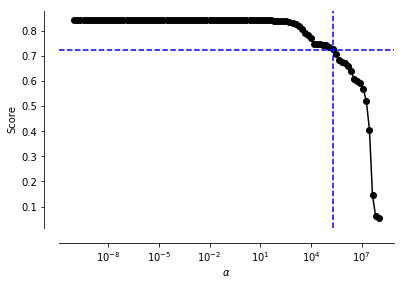

In [226]:
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

In [232]:
print(lassocv_alpha)
print(lassocv_score)
lassocvfit.

209067.77468299225
0.7239847409912272


<bound method BaseEstimator.get_params of LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)>

In [202]:
# Lasso
lasso = linear_model.LassoCV() # create a ridge regression instance
lasso.fit(train_x, train_y) # fit data
lasso.coef_, lasso.intercept_ # print out the coefficients

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(array([-6.45823167e+01,  3.89323030e-01,  1.28142704e+04, -1.89160493e+02,
        -4.96461595e+03,  1.02189213e+04,  5.49949104e+03,  2.57448886e+02,
        -3.25625478e+02, -4.24139839e+03,  2.61362347e+01,  9.35890582e+03,
        -2.75629448e+03,  7.41771534e+03, -8.68013678e+03,  5.09499175e+03,
         1.12541789e+03,  3.25669158e+01, -1.17766494e+03,  3.65472218e+01,
         2.66359434e+01,  1.65620946e+01,  1.33743228e+03, -4.86158453e+02,
         7.59168183e+01,  6.30437944e+01,  4.64503157e+01,  7.63386917e+00,
         9.42293858e+03,  1.70369913e+03,  9.86275060e+03,  6.66265565e+03,
        -4.17672074e+03, -2.48974496e+04,  8.97137821e+03,  5.49497831e+03,
         5.20822739e+03,  4.74305405e+03, -3.46950855e+02, -9.47943241e+01,
         9.42269524e+02,  8.70425771e+03,  1.86875303e+01,  5.10406291e+03,
        -1.03027587e+04,  5.54593482e+02,  1.76700753e+01, -7.40344419e+01,
        -6.52886961e+01, -3.71700354e+01, -2.15646039e+01, -1.38963567e+01,
         0.0

In [203]:
from sklearn.model_selection import GridSearchCV

para_search = GridSearchCV(estimator=lasso, param_grid=alpha_100,  cv=5, return_train_score=True)
para_search = para_search.fit(train_x, train_y)

AttributeError: 'numpy.float64' object has no attribute 'items'

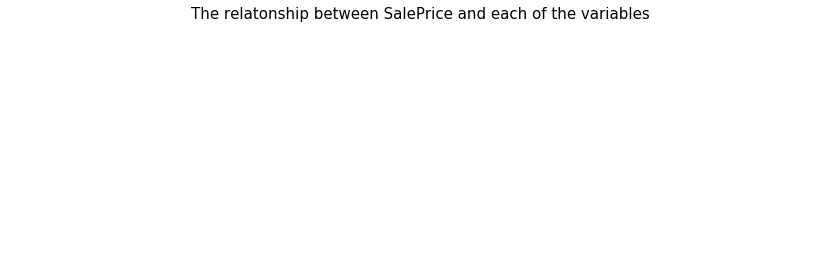

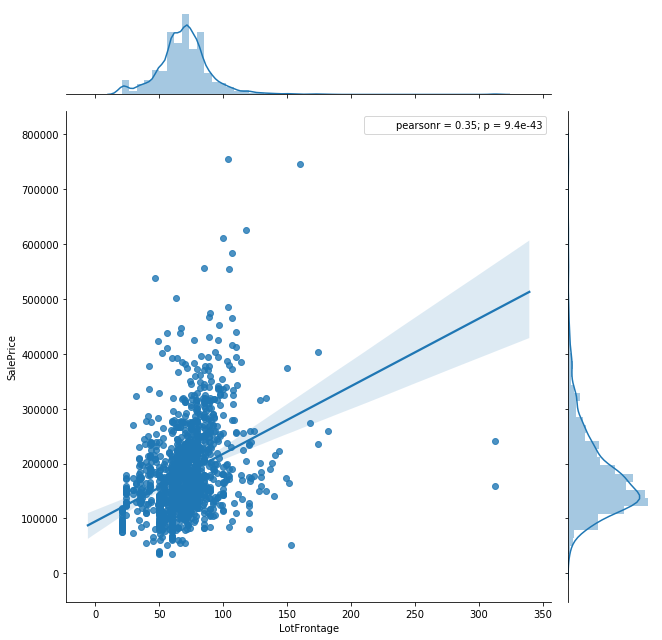

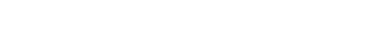

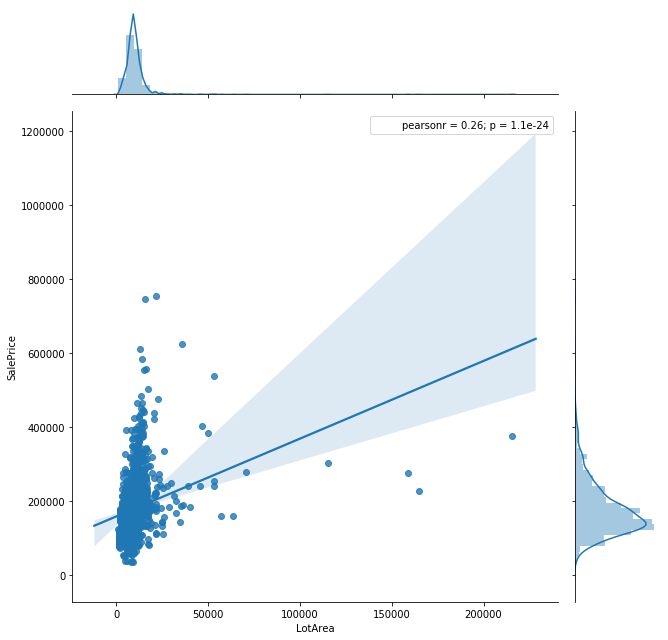

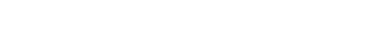

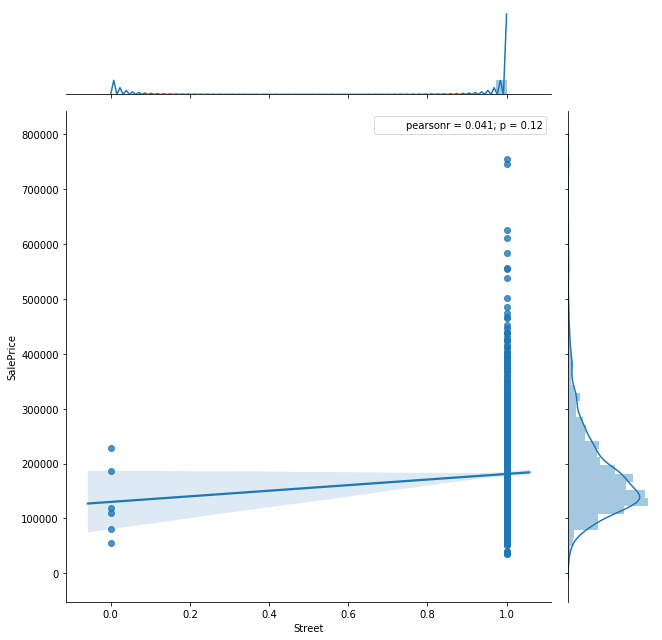

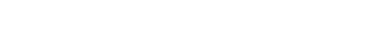

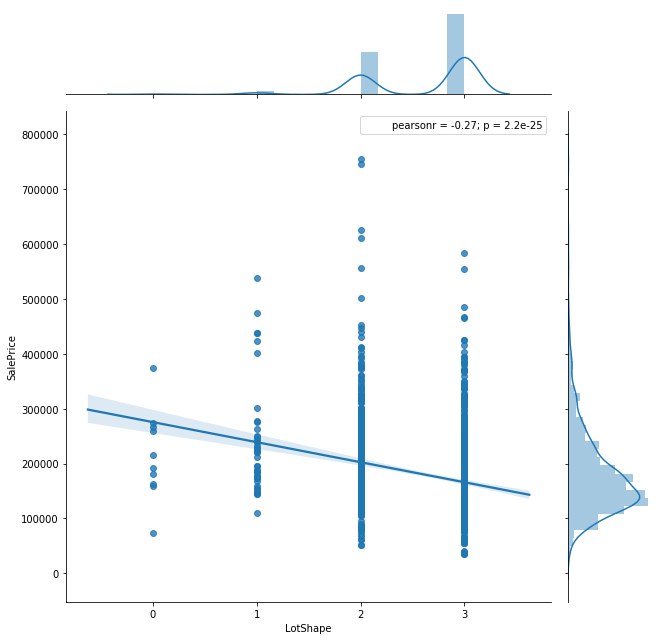

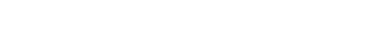

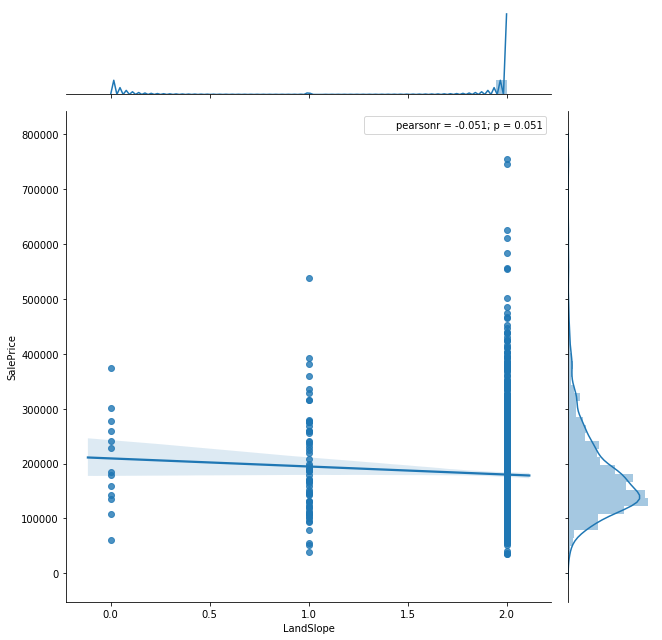

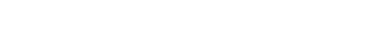

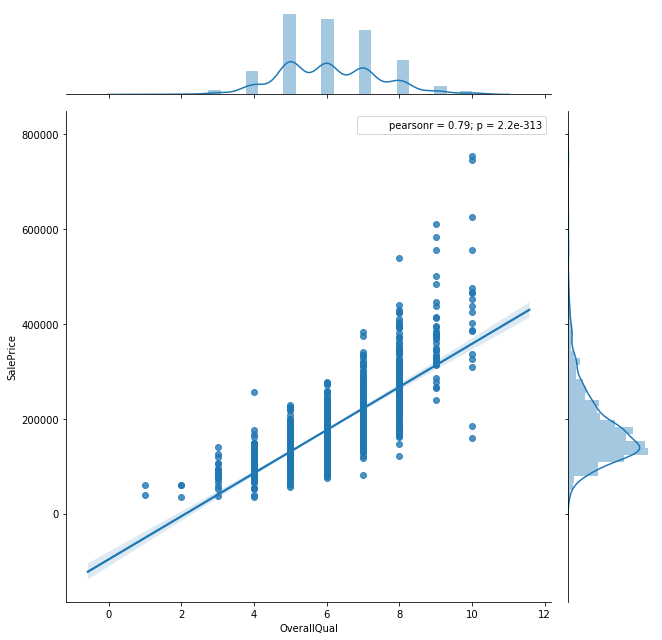

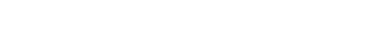

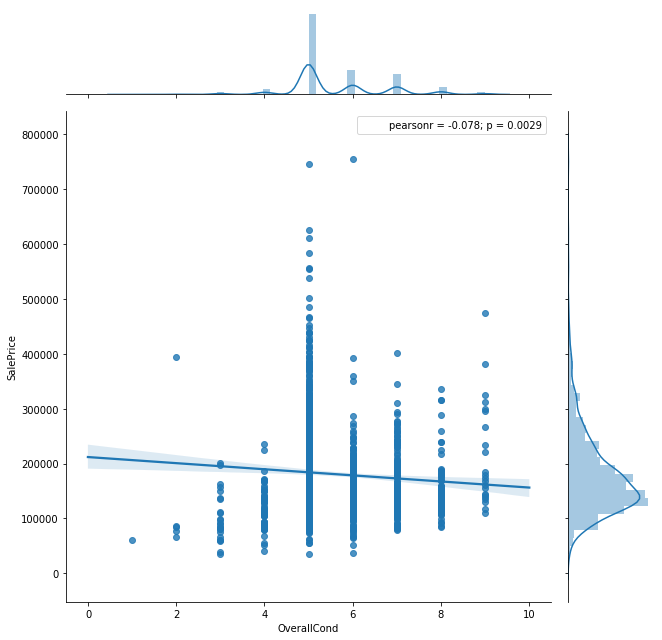

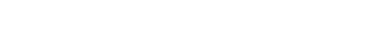

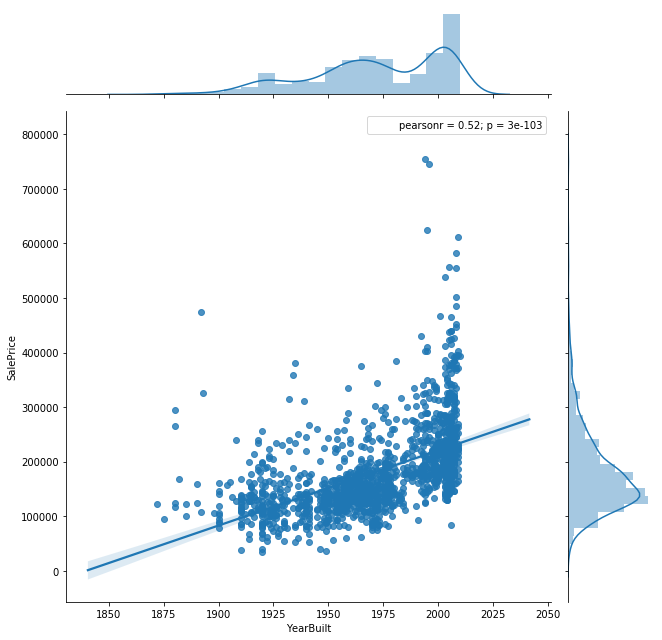

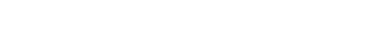

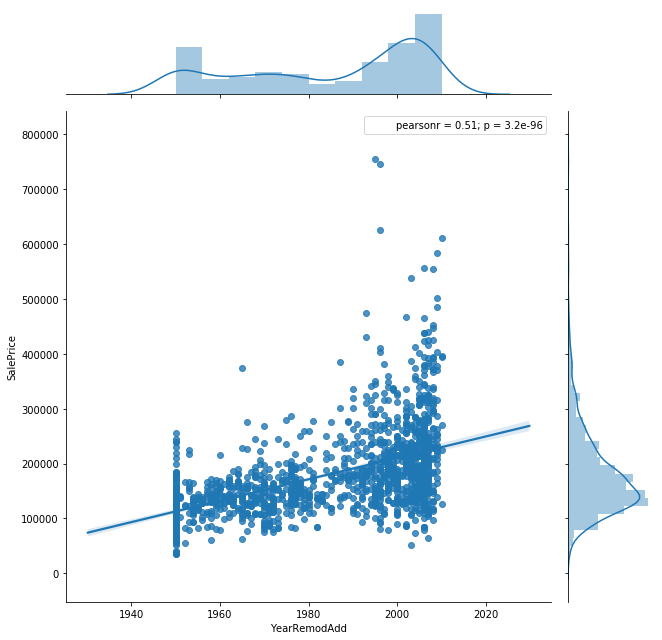

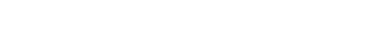

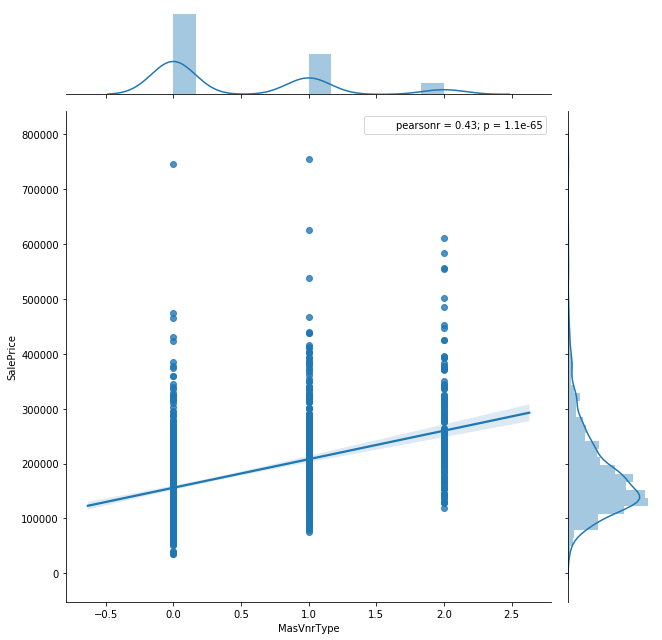

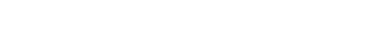

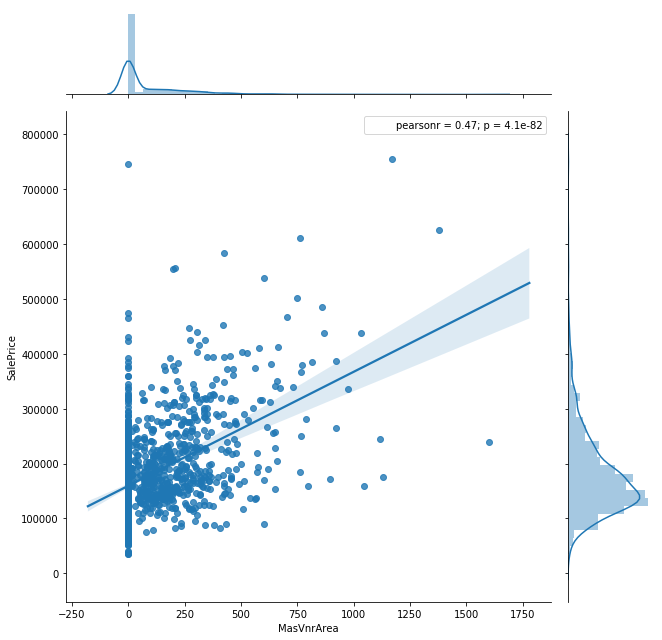

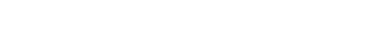

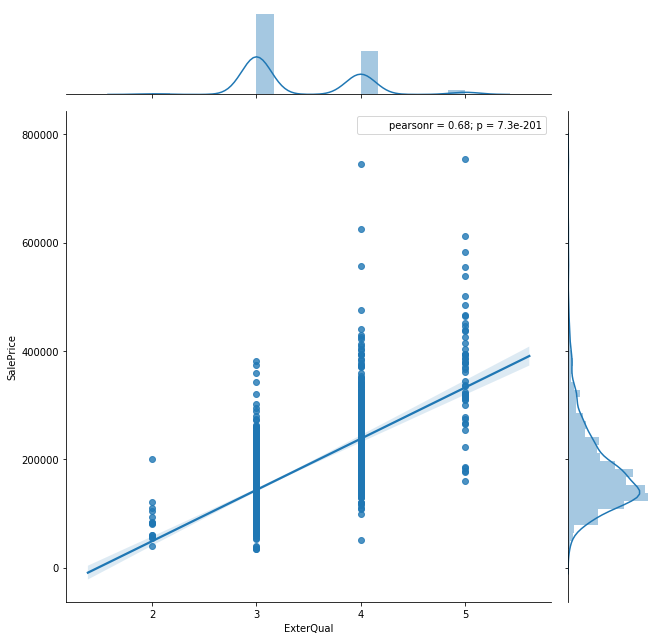

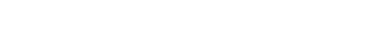

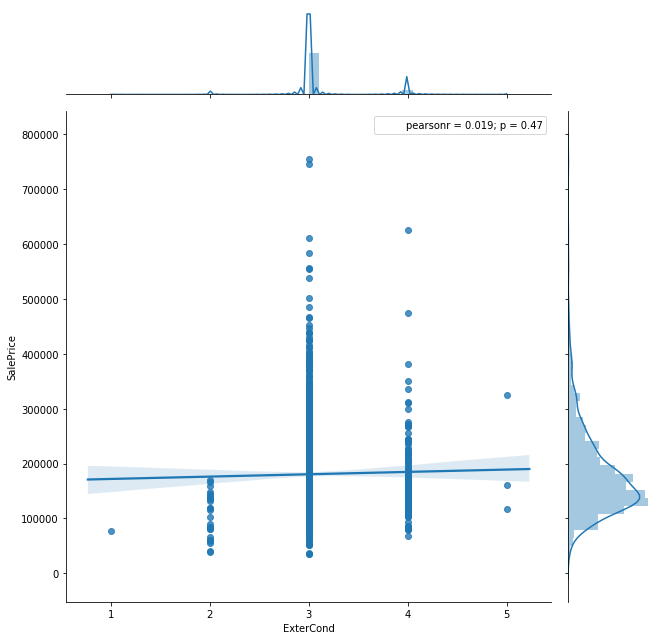

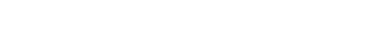

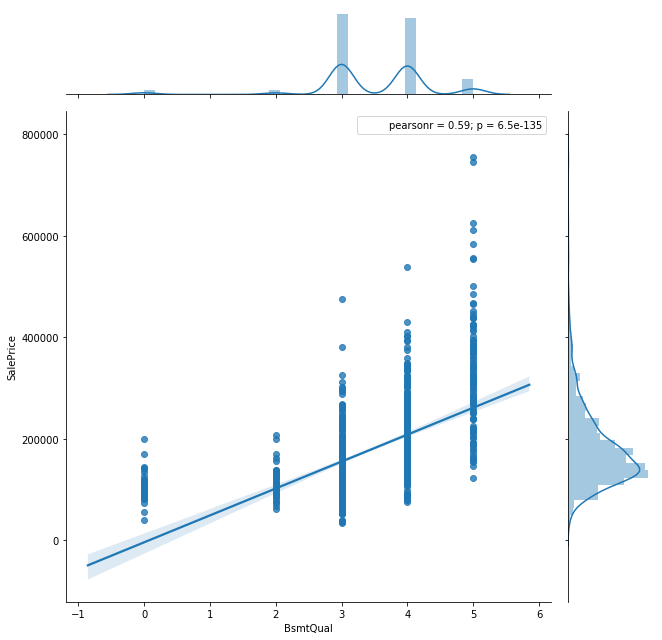

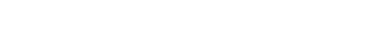

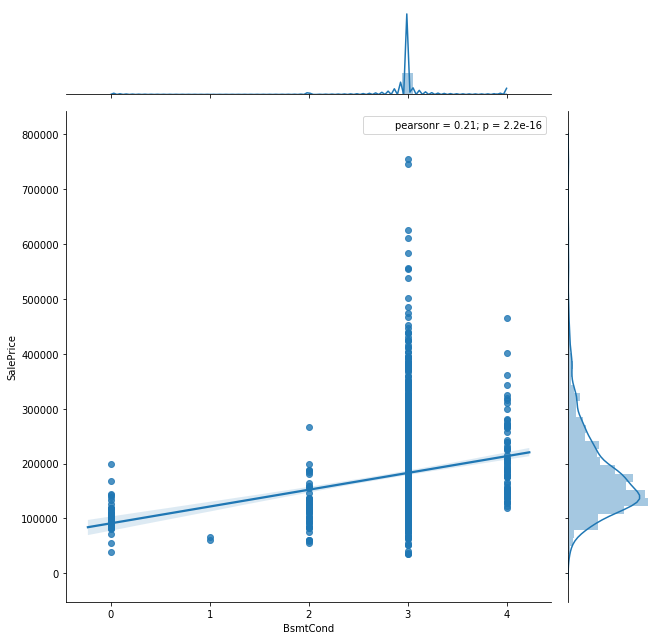

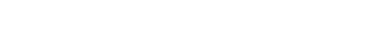

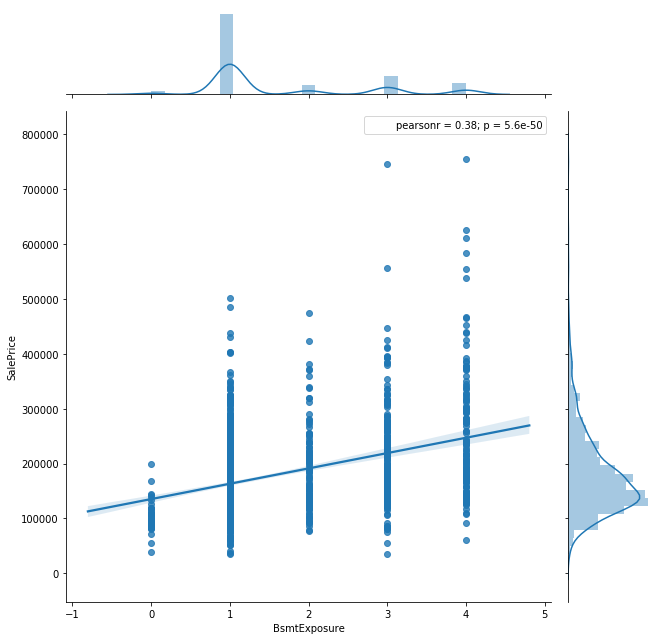

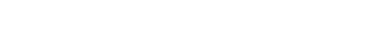

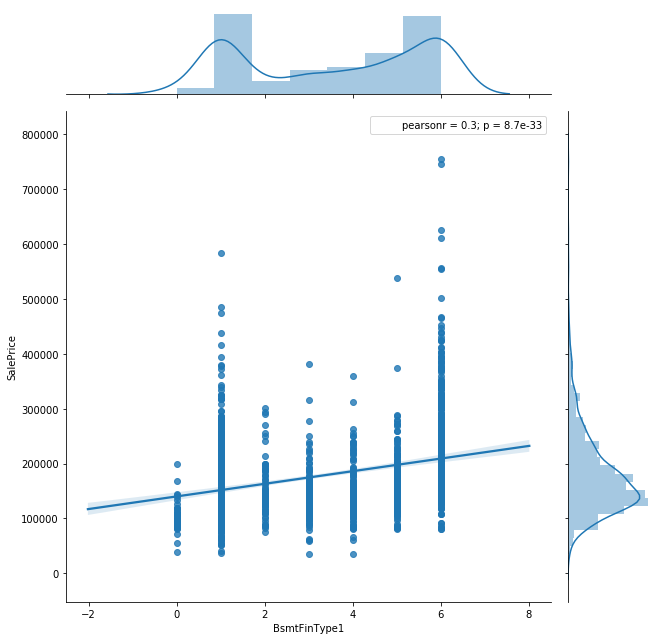

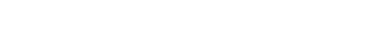

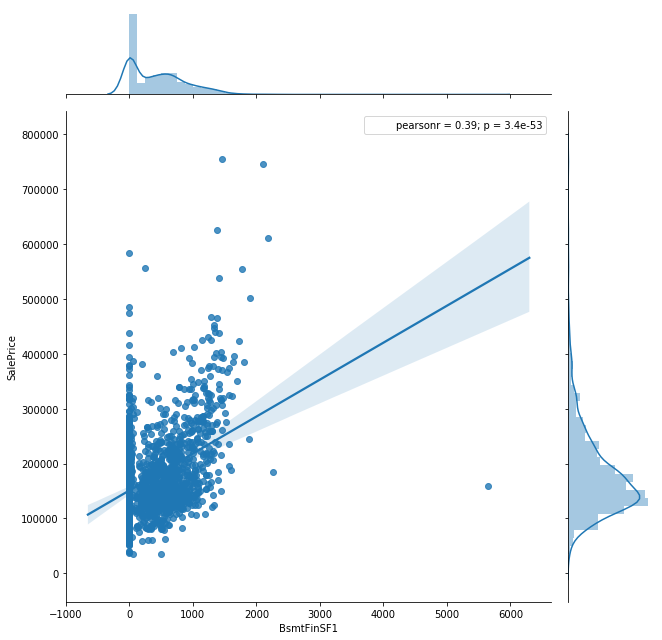

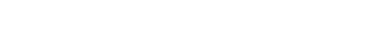

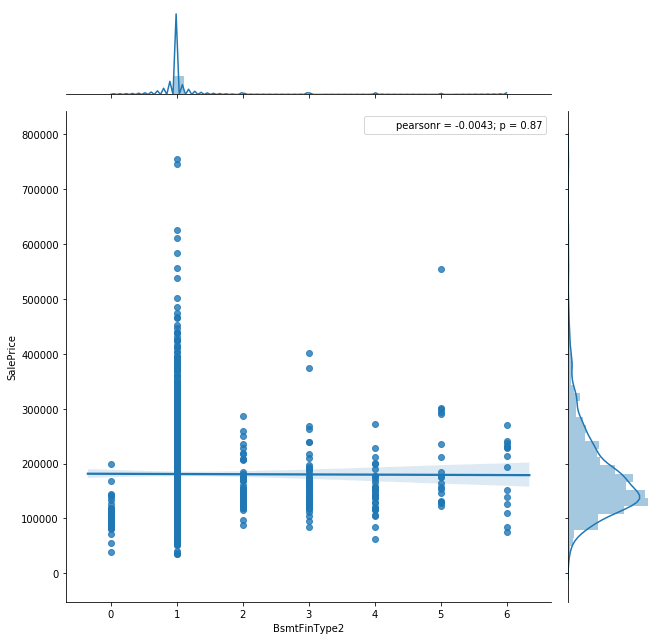

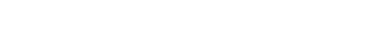

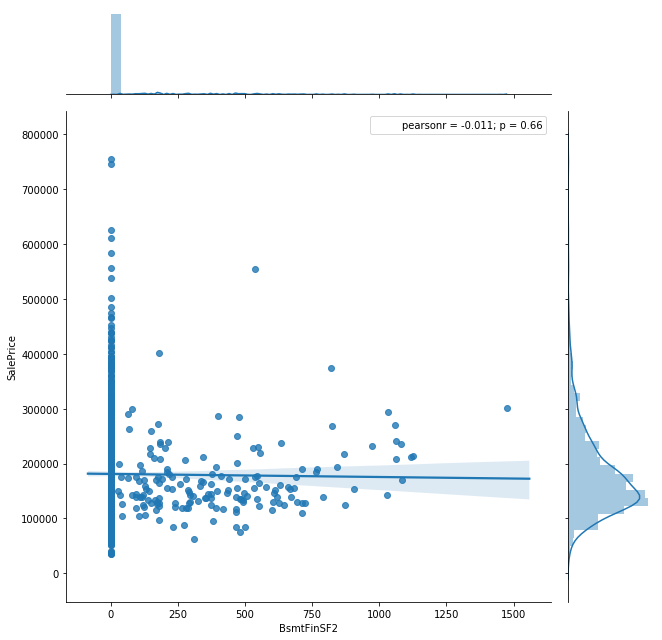

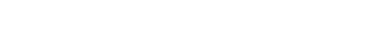

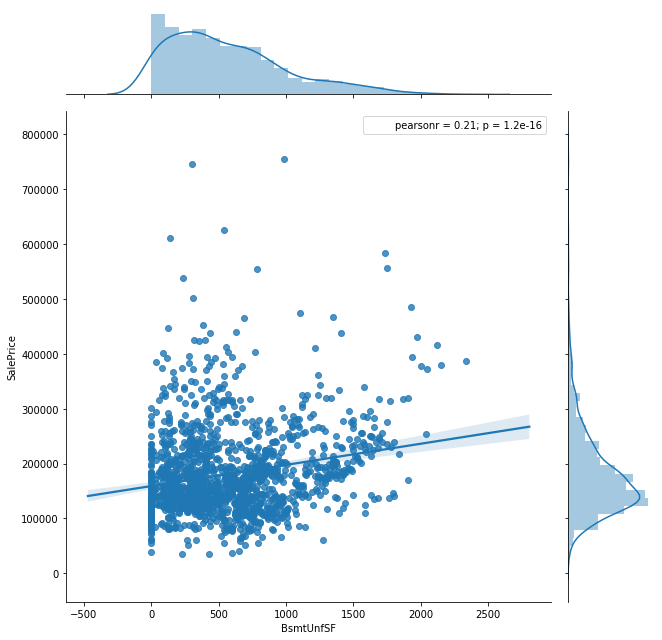

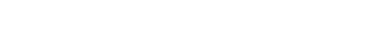

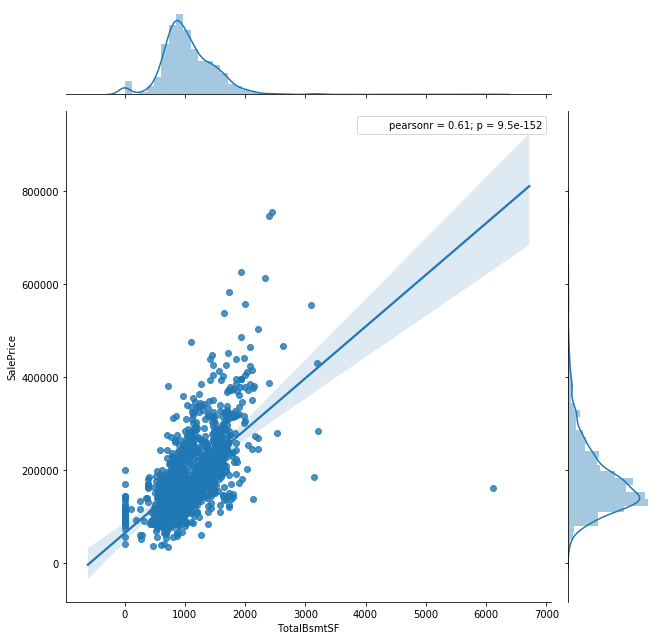

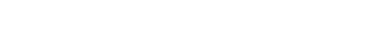

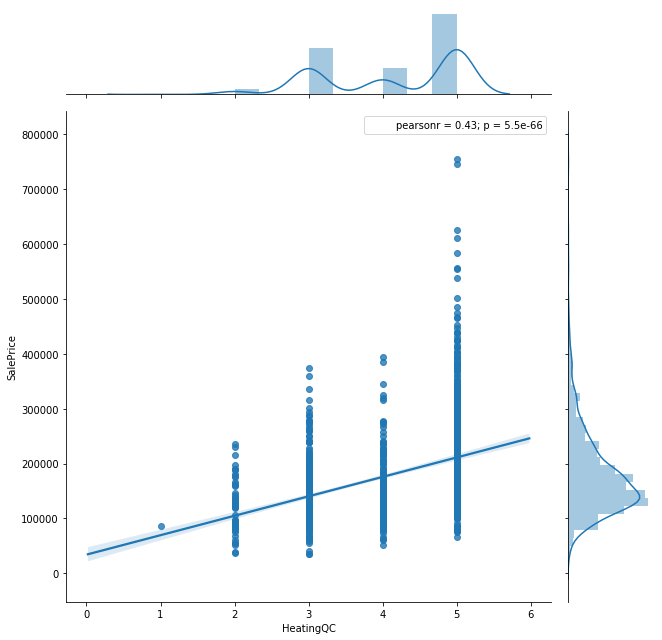

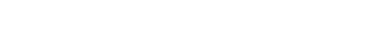

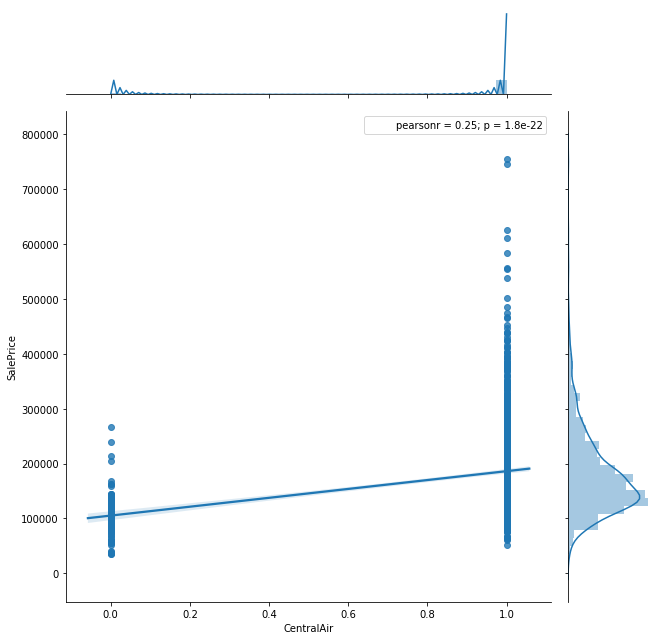

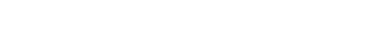

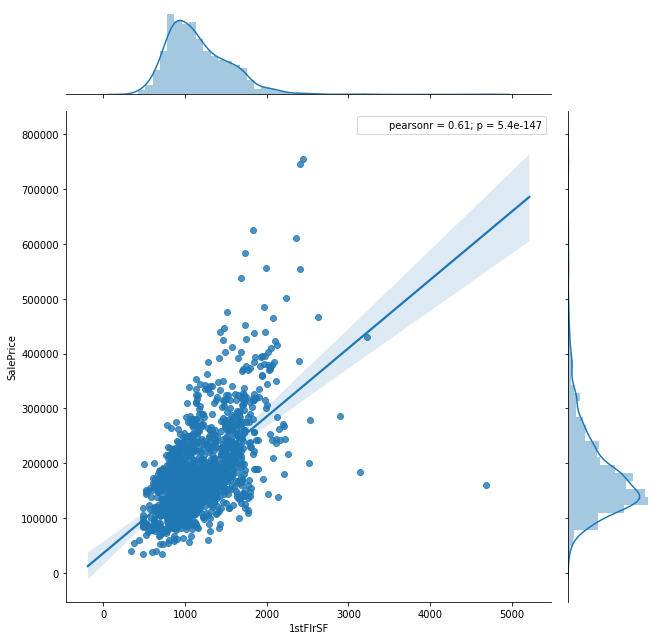

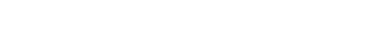

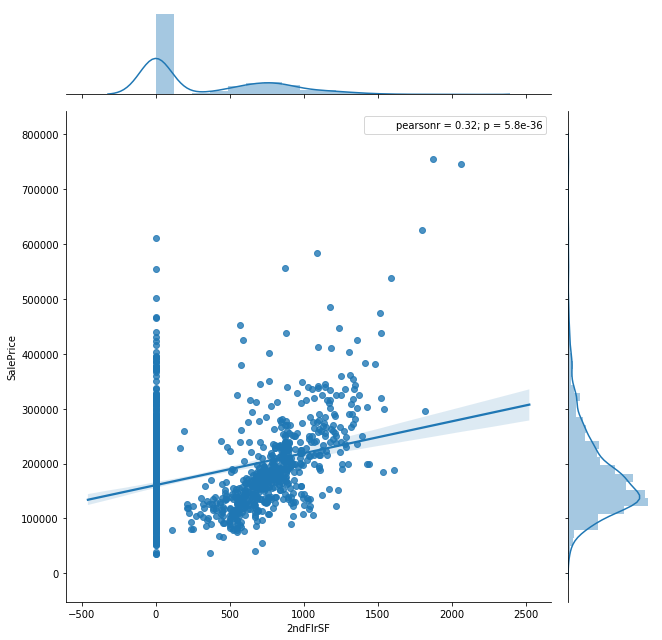

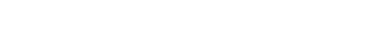

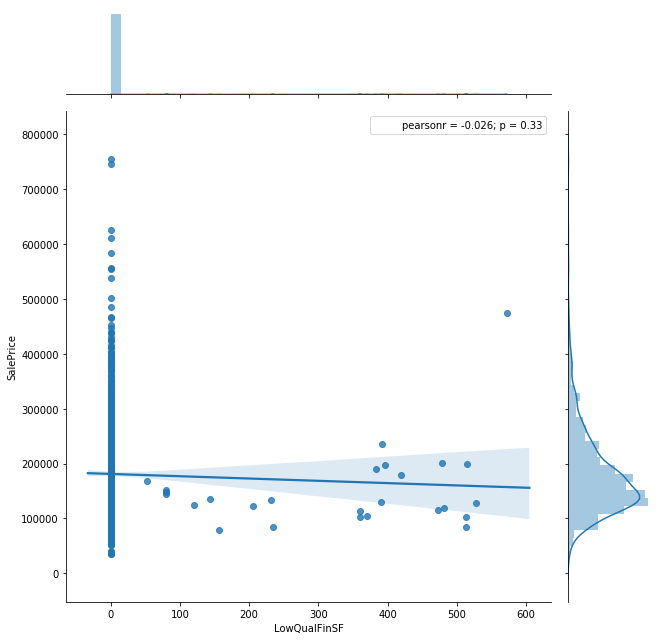

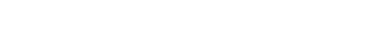

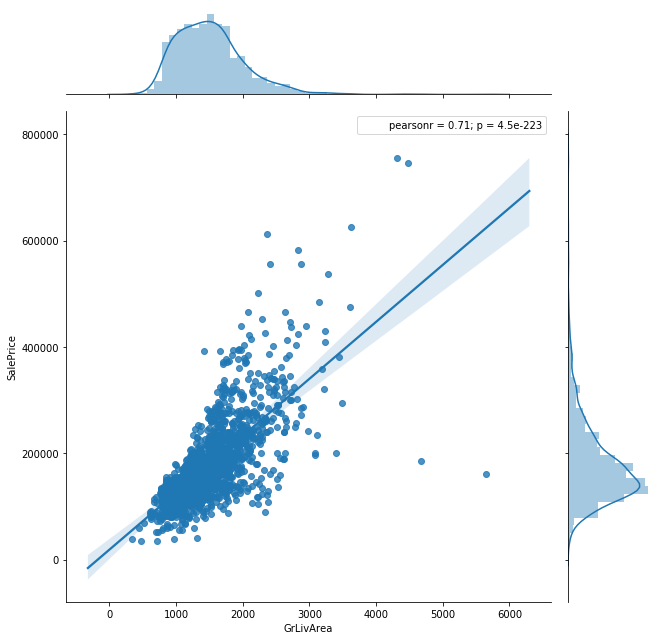

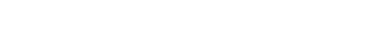

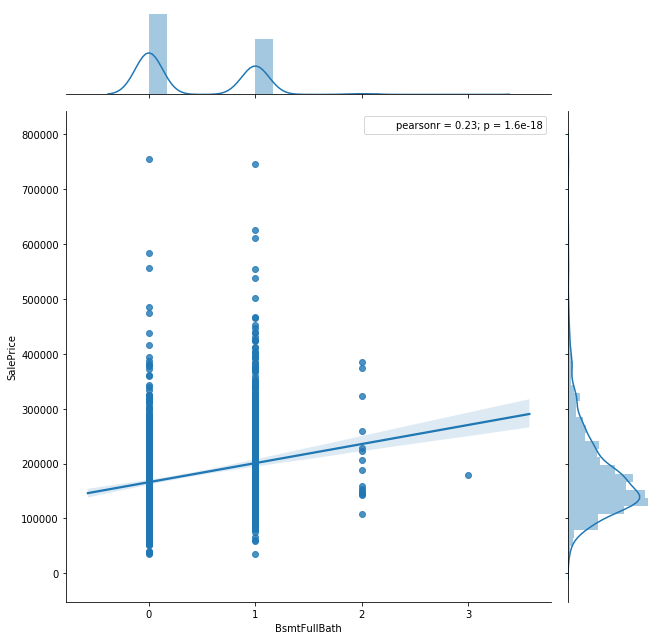

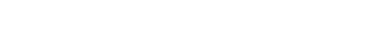

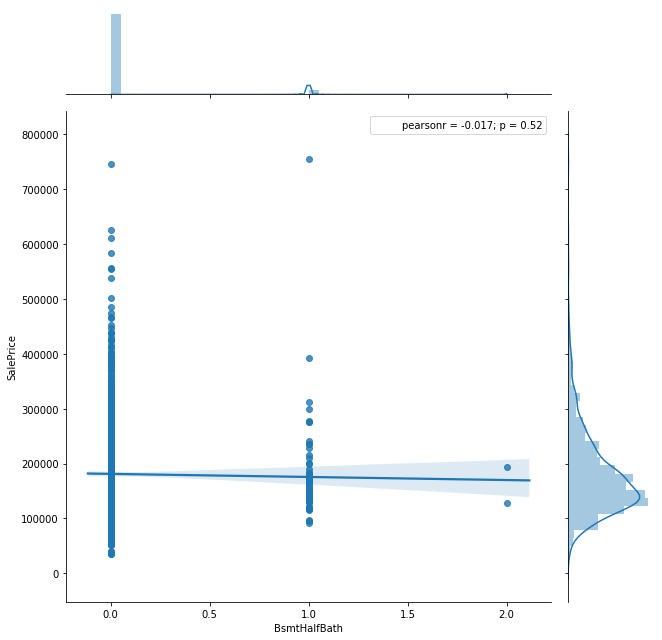

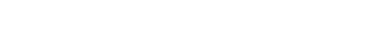

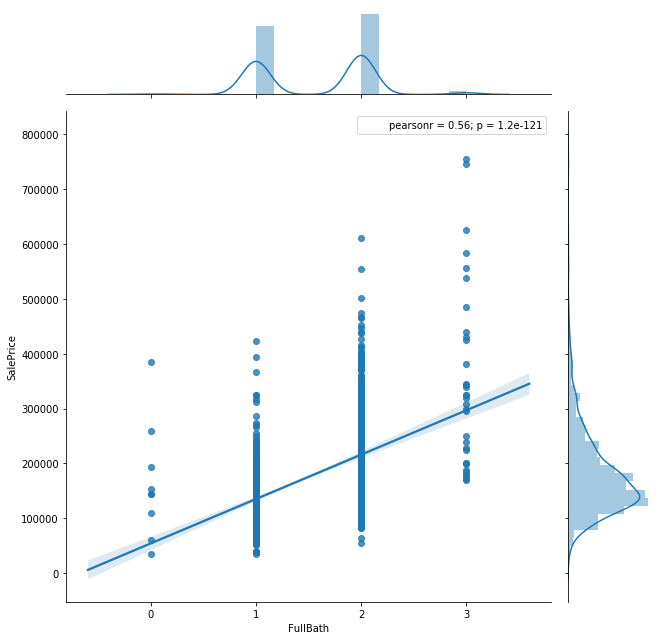

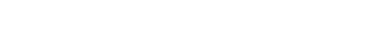

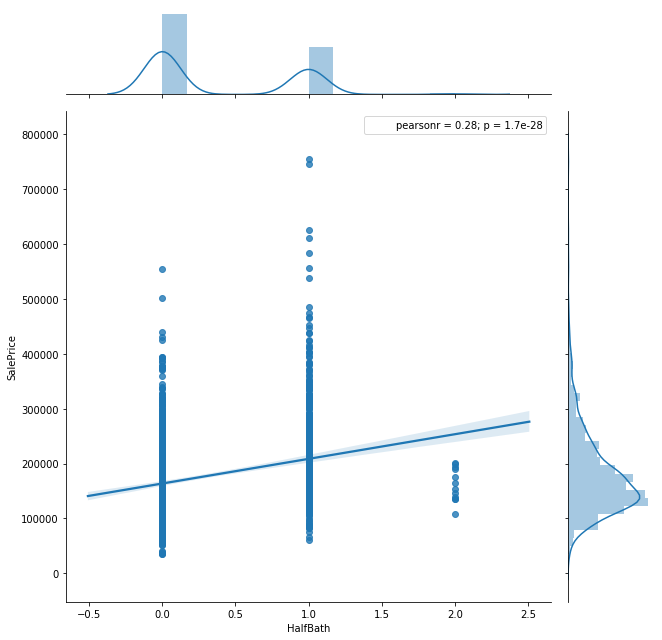

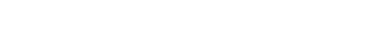

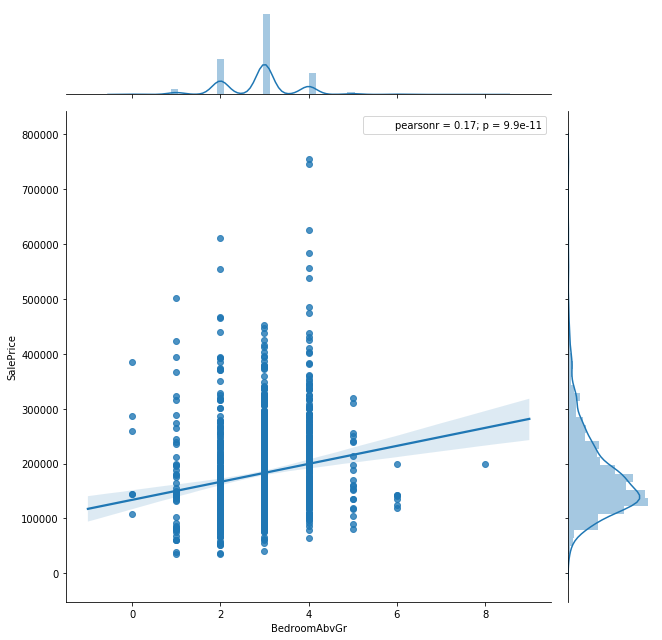

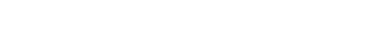

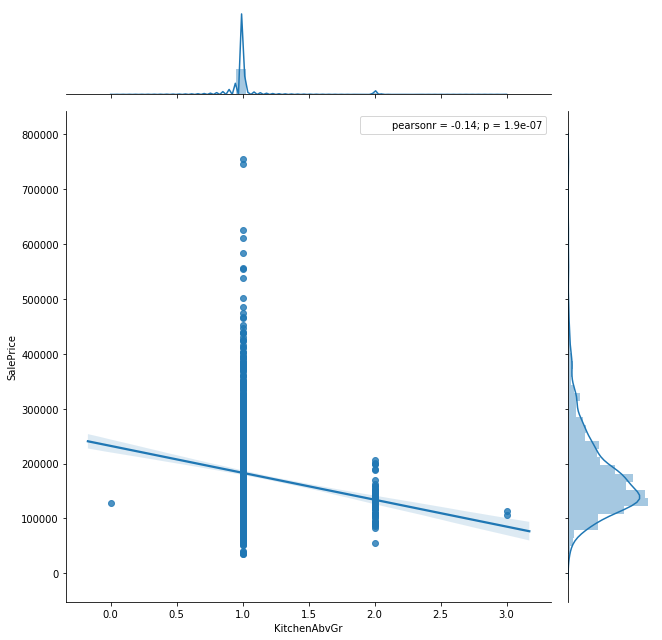

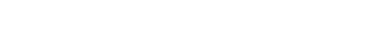

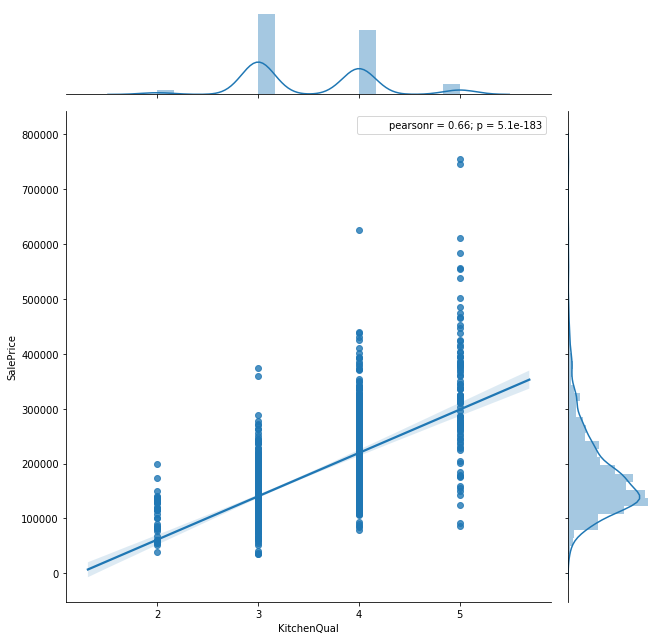

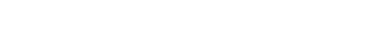

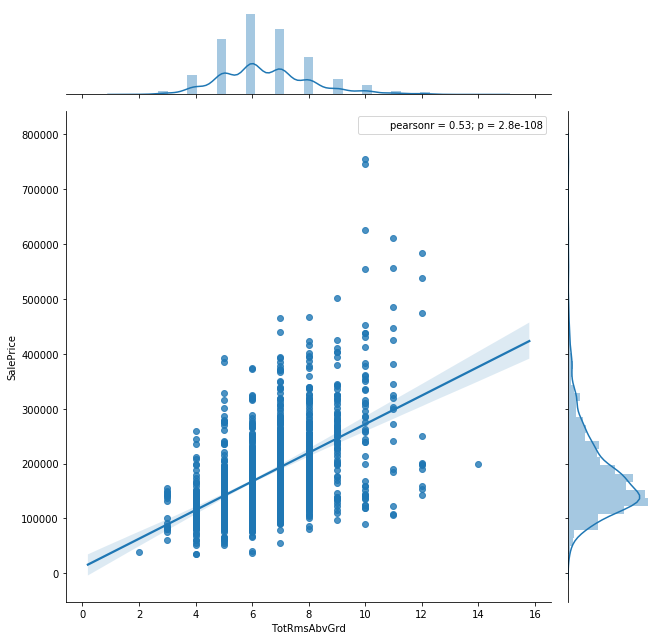

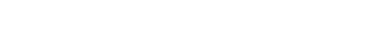

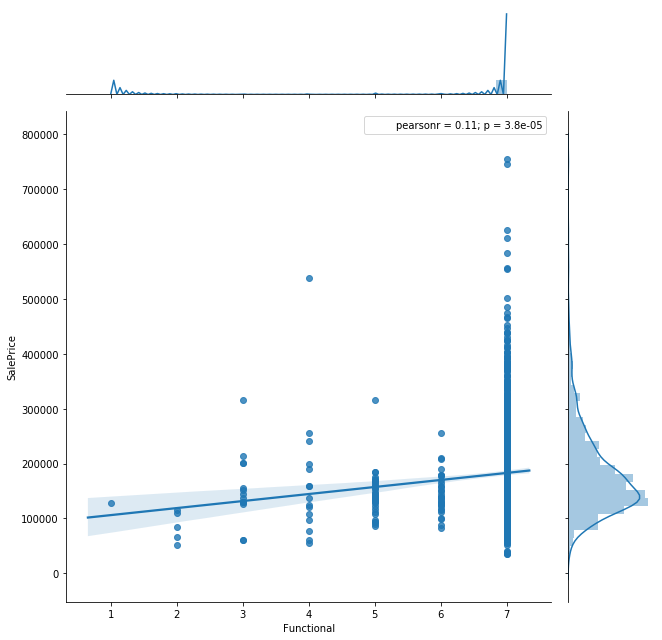

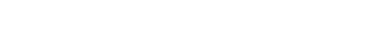

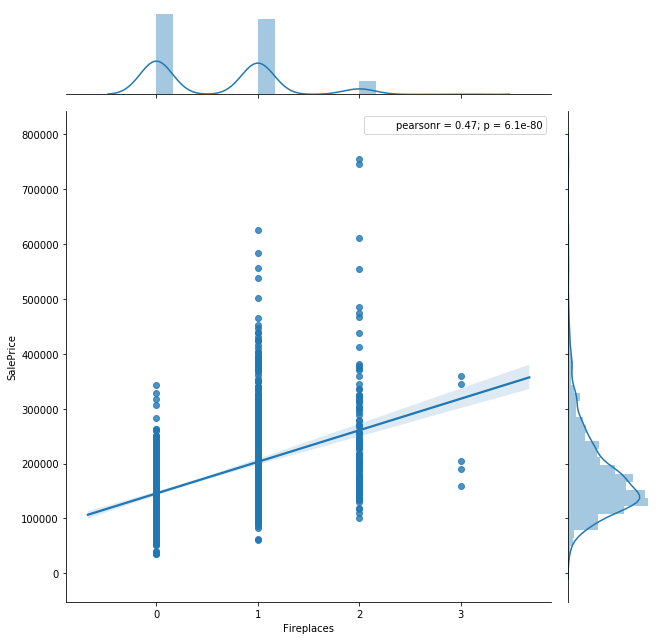

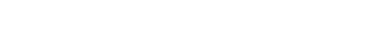

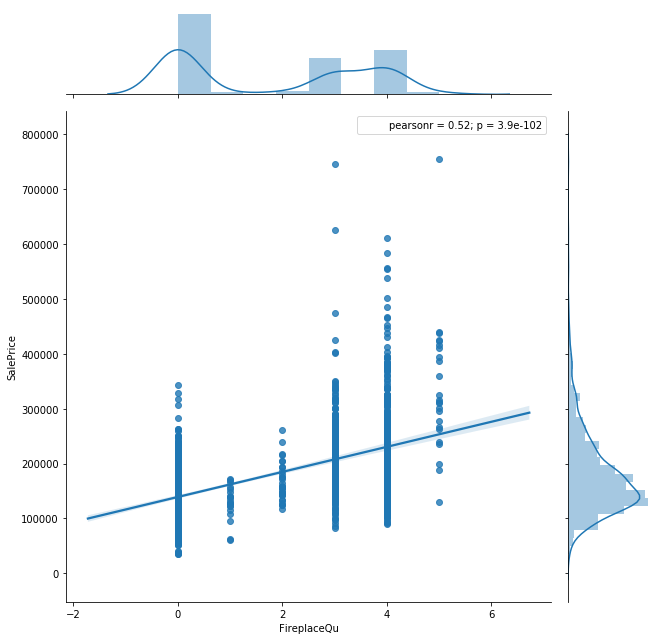

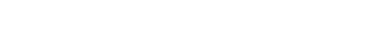

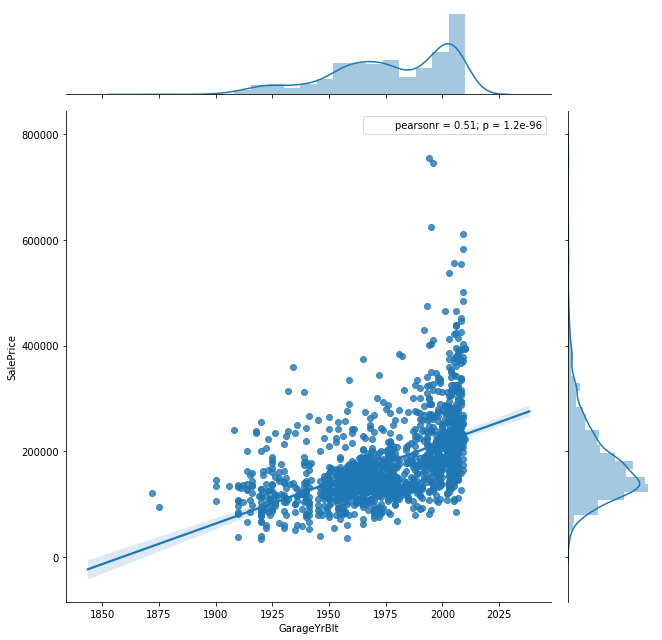

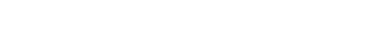

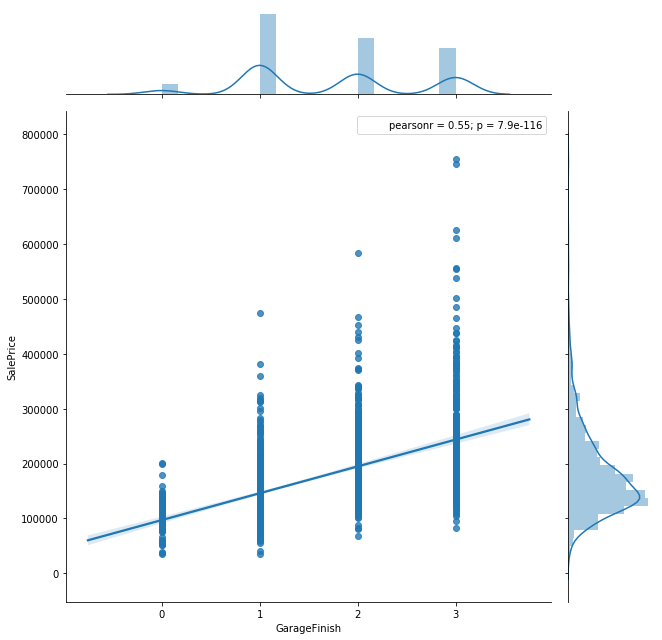

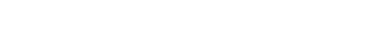

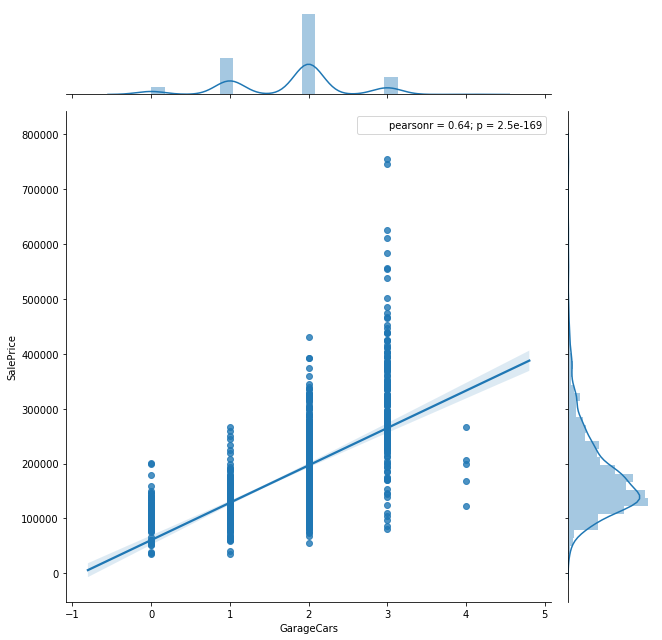

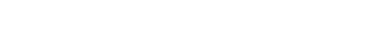

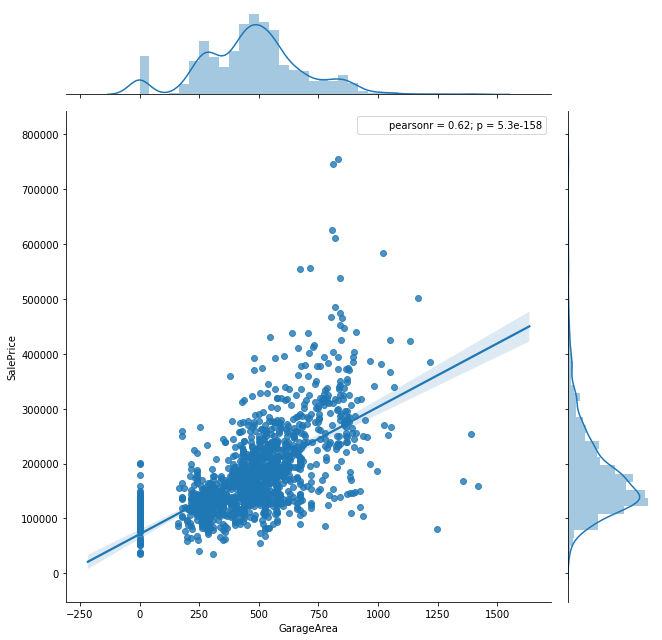

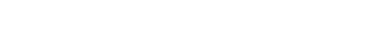

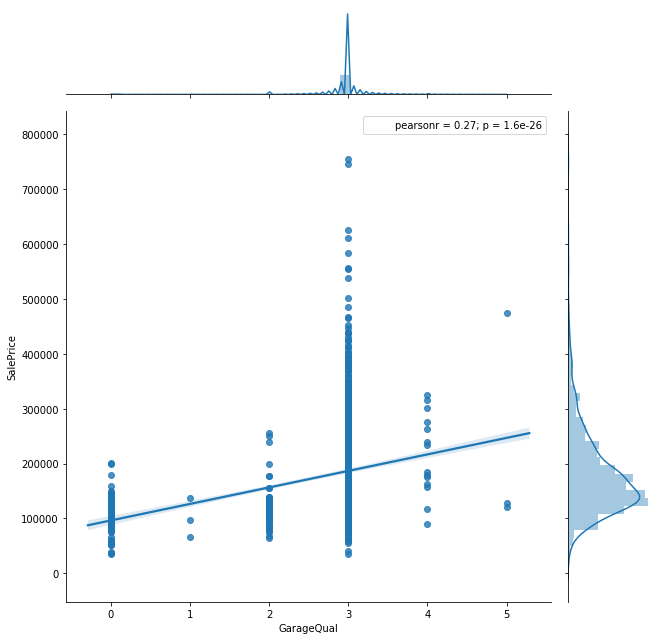

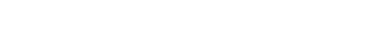

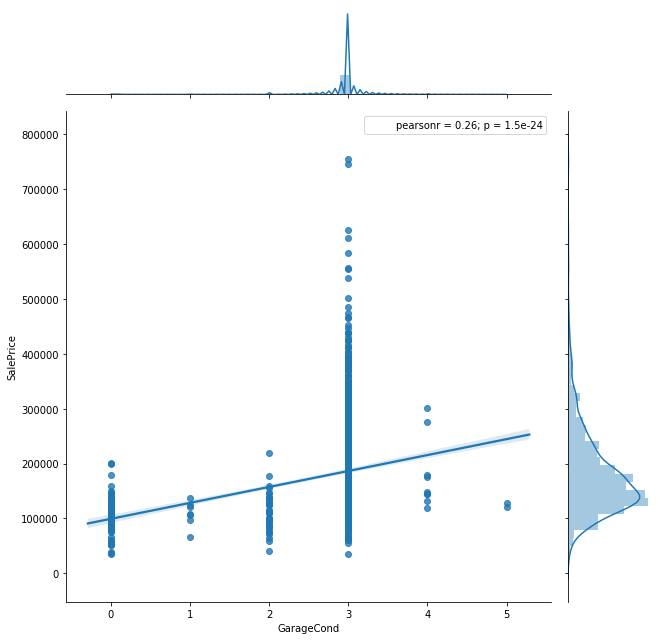

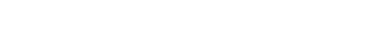

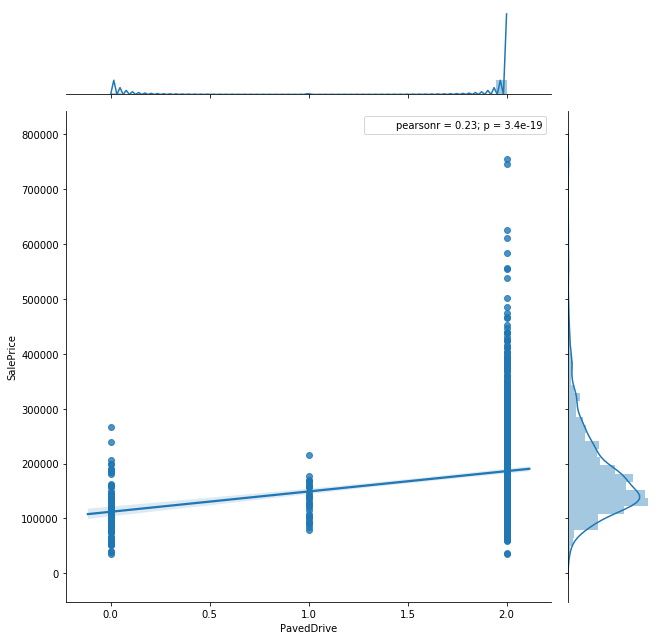

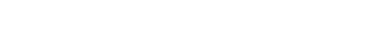

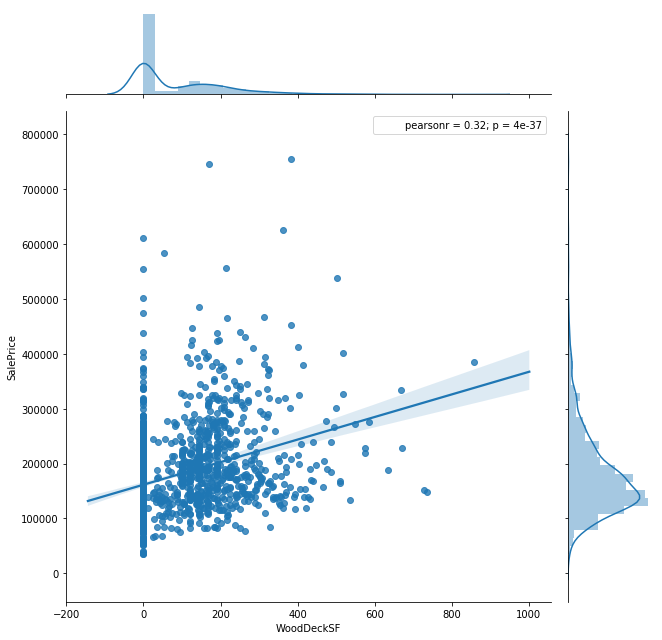

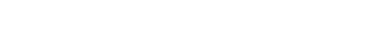

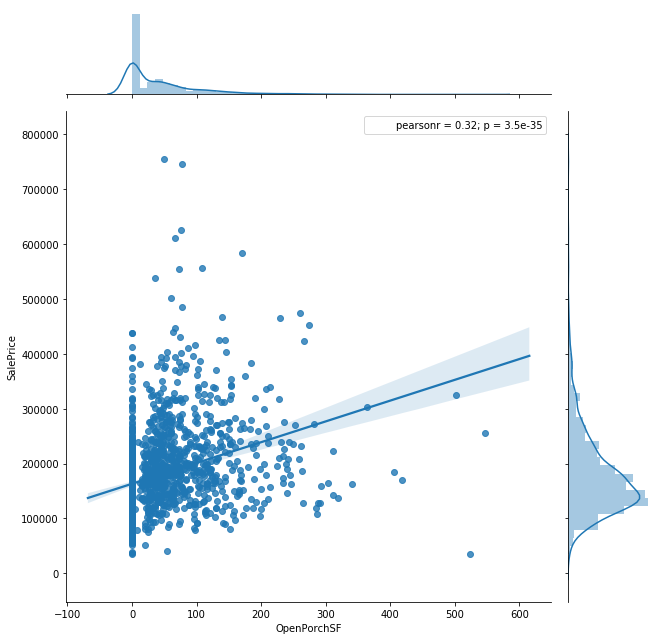

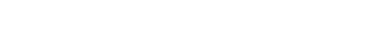

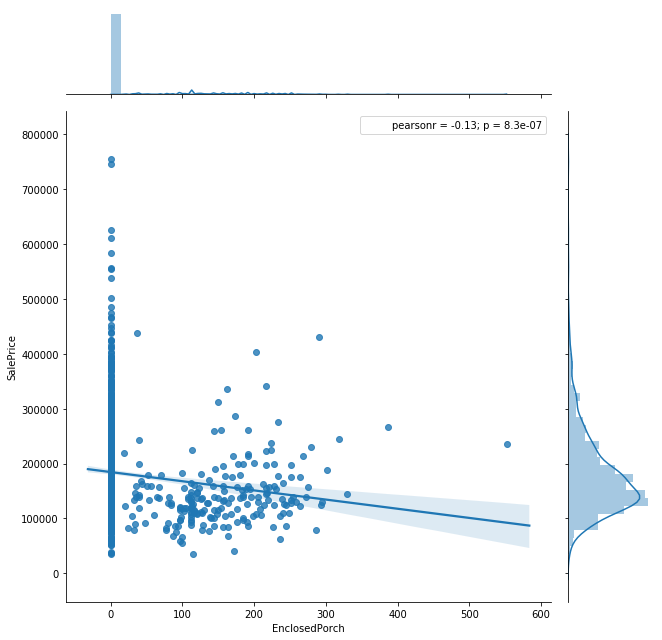

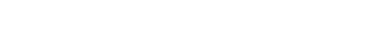

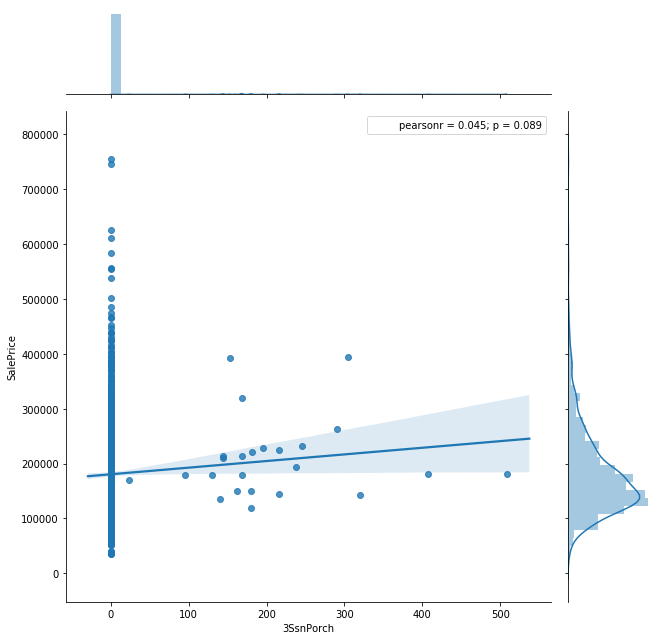

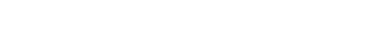

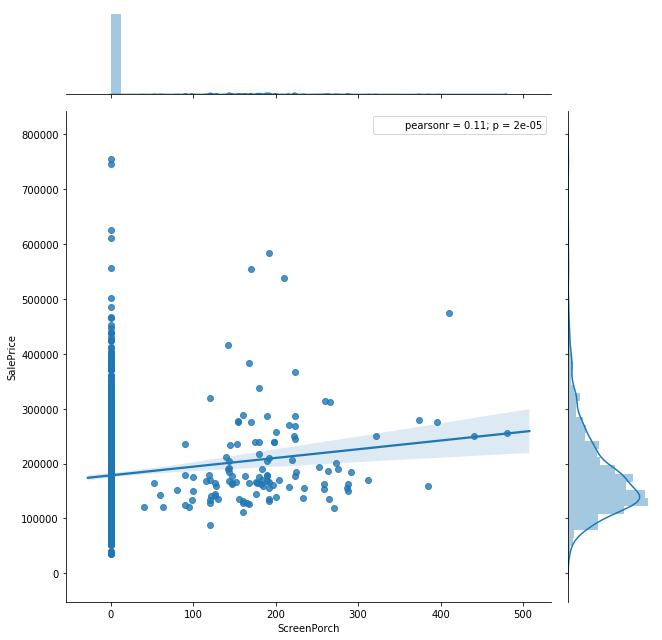

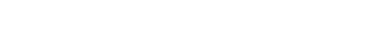

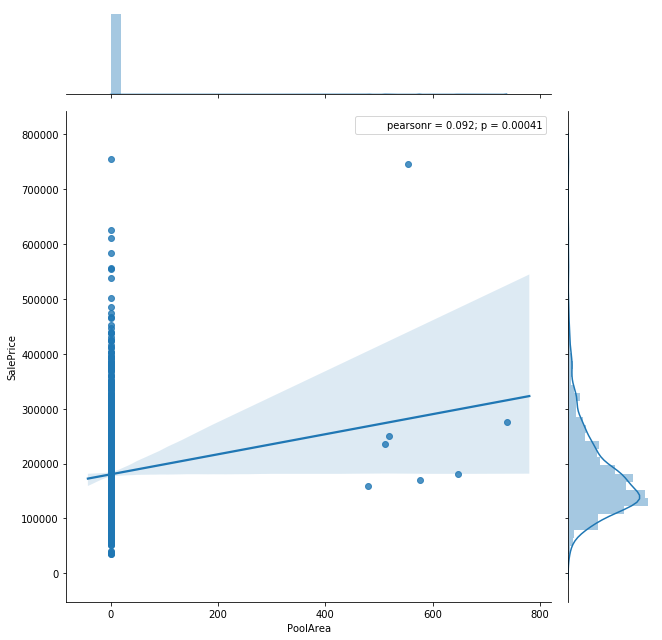

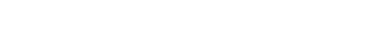

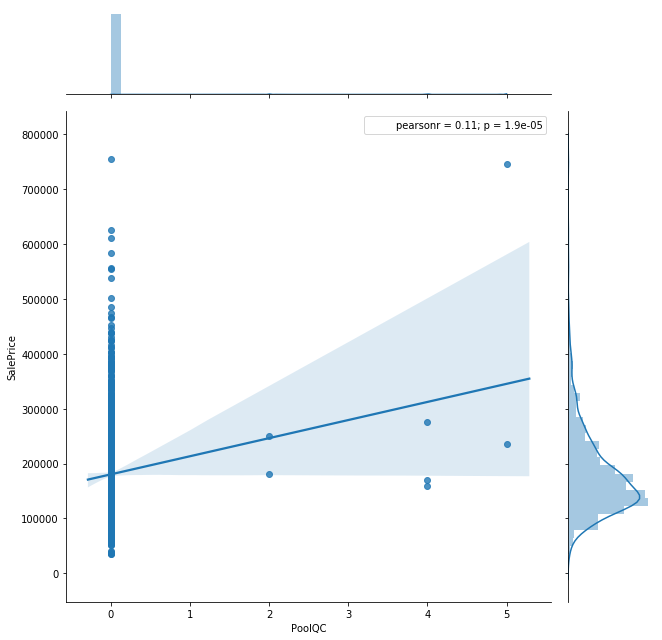

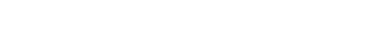

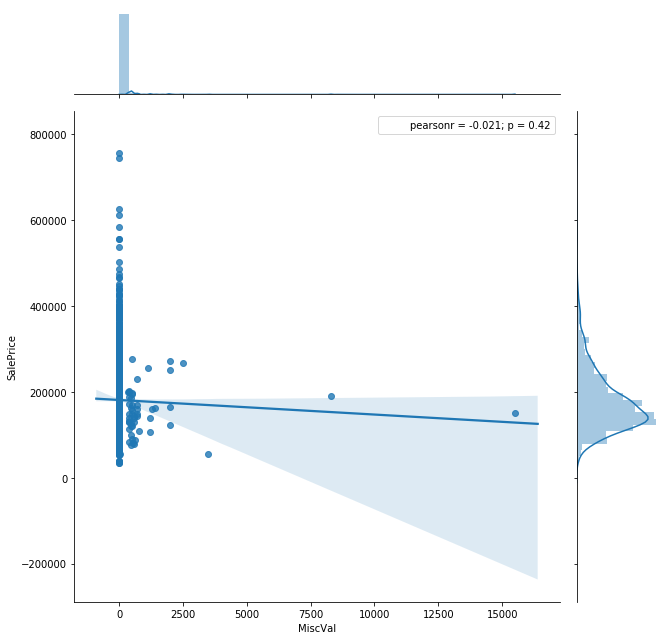

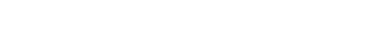

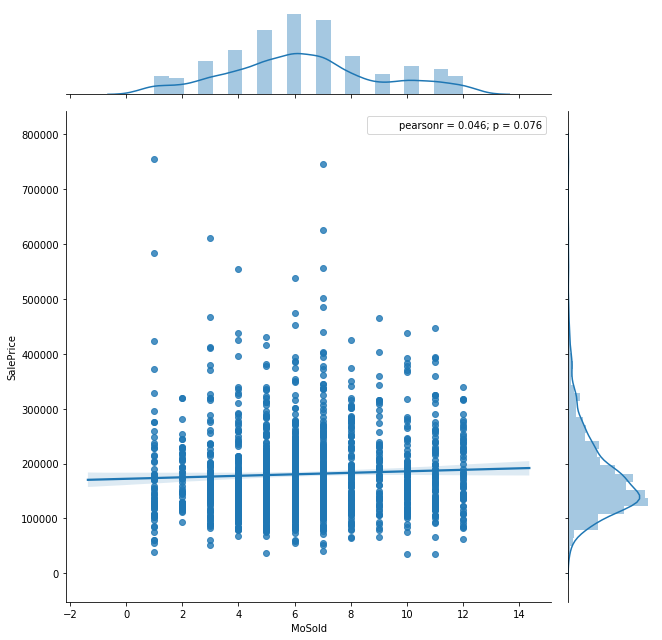

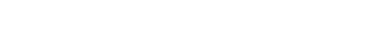

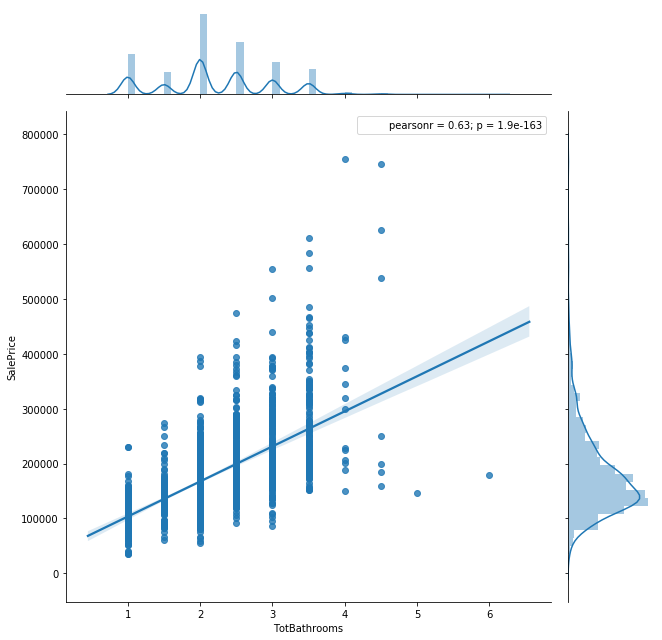

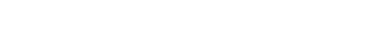

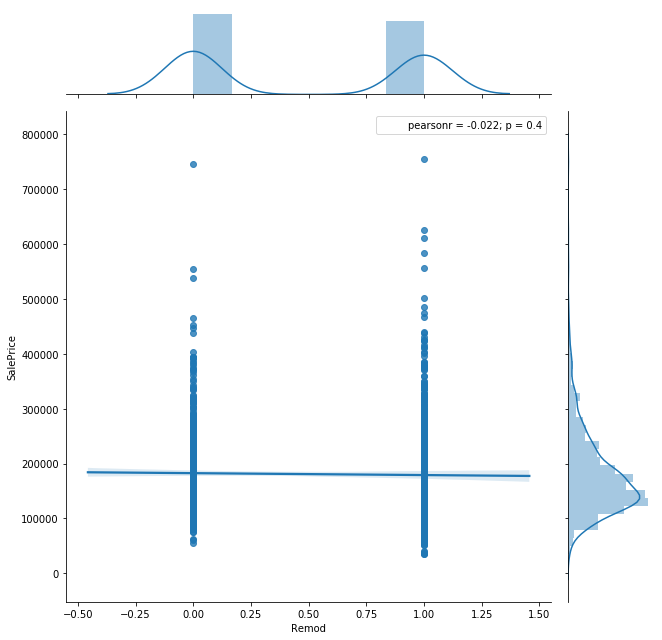

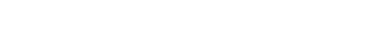

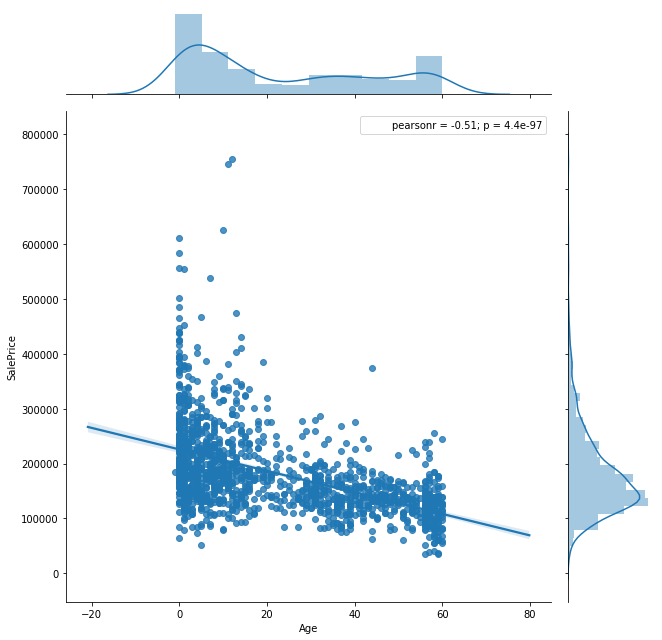

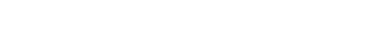

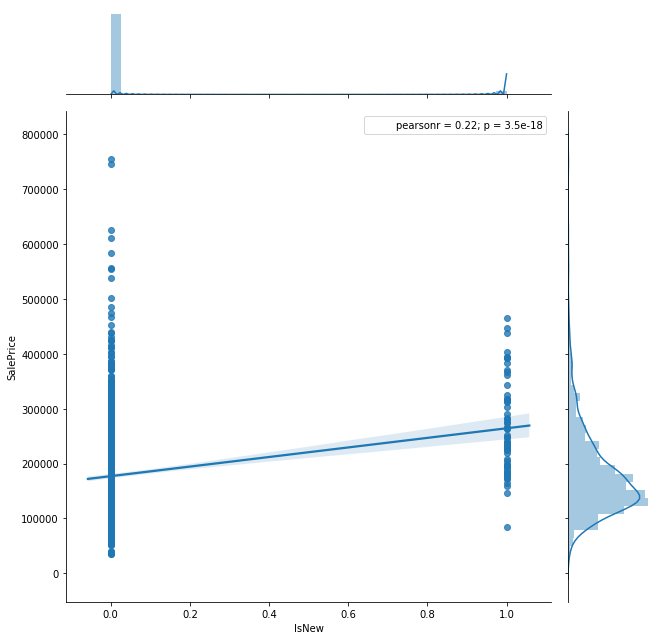

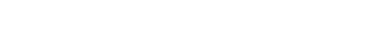

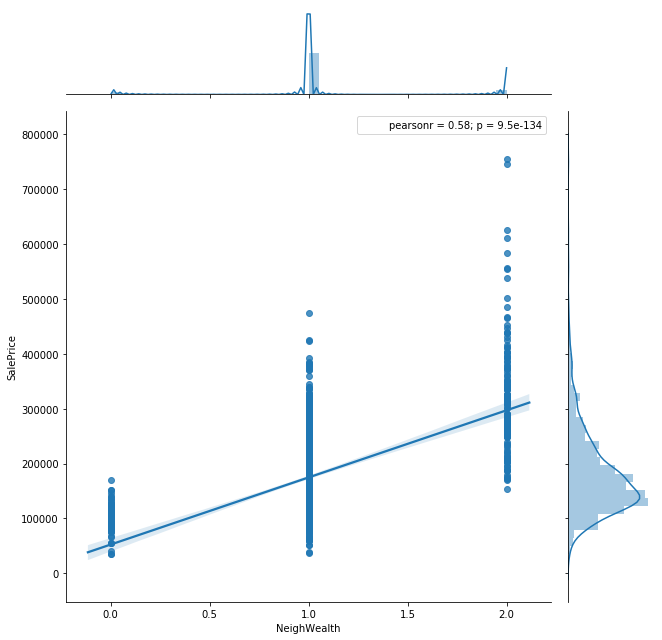

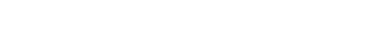

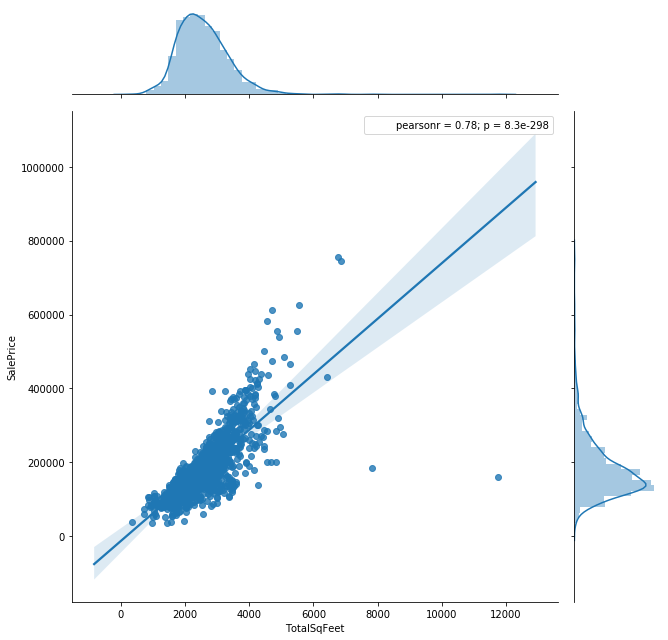

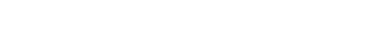

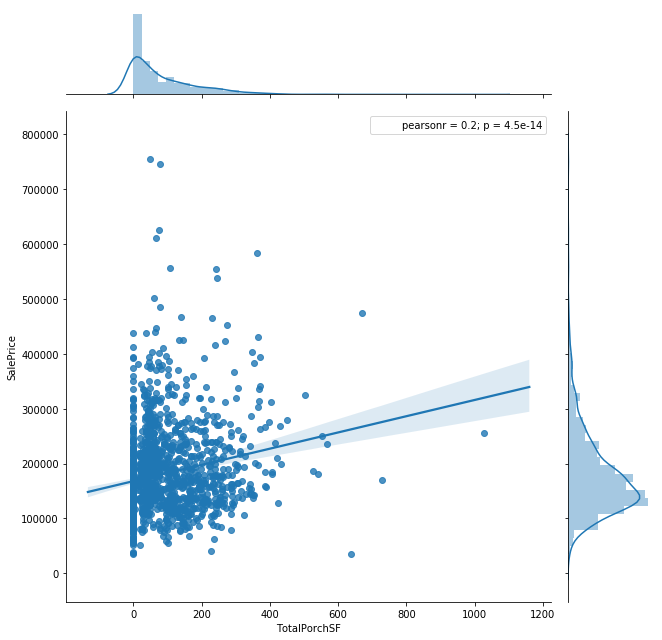

In [70]:
# A grid joint plot showing all at once the relationship between SalePrice and each of all the variables 
#       (with its correlation coefficiant) as well as its distribution 


from scipy import stats
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

fig = plt.figure(figsize=(14, 300))
gs = gridspec.GridSpec(X_numeric.shape[1], 1)

for i in range(X_numeric.shape[1]):
    ax1 = plt.subplot(gs[i, 0])
    g = sns.jointplot(x=X_numeric.iloc[:, i],y=y,
              kind='reg',height=9)
    g = g.annotate(stats.pearsonr)
    ax1.set_axis_off()
    if i == 0:
        ax1.set_title('The relatonship between SalePrice and each of the variables', size=15)
    plt.show()
